# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import ttest_ind, chi2_contingency
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go


In [2]:
import sys
sys.path.append('../src')
from functions import *
# raw data
df_clients_profile = pd.read_csv('../Data/Raw/df_final_demo.txt')
df_web_data_1 = pd.read_csv('../Data/Raw/df_final_web_data_pt_1.txt')
df_web_data_2 = pd.read_csv('../Data/Raw/df_final_web_data_pt_2.txt')
df_experiment_clients = pd.read_csv('../Data/Raw/df_final_experiment_clients.txt')
# processed data
df_test = pd.read_csv('../Data/Cleaned_Data/df_test.csv')
df_test_final = pd.read_csv('../Data/Cleaned_Data/df_test_final.csv')
df_control = pd.read_csv('../Data/Cleaned_Data/df_control.csv')
df_control_final = pd.read_csv('../Data/Cleaned_Data/df_control_final.csv')
df_final = pd.read_csv('../Data/Cleaned_Data/df_final.csv')
df_combined = pd.read_csv('../Data/Cleaned_Data/df_combined.csv')
pd.set_option('display.max_columns', None)
df_web_data = pd.concat([df_web_data_1, df_web_data_2], ignore_index= True)

# Data Preprocessing
### Ensure that the data types are correctly assigned, especially for categorical variables.

In [3]:
df_test = convert_data_types_combined(df_test)
df_test_final = convert_data_types_combined(df_test_final)
df_control = convert_data_types_combined(df_control)
df_control_final = convert_data_types_combined(df_control_final)
df_final = convert_data_types_combined(df_final)
df_combined = convert_data_types_combined(df_combined)

## Correlation between numerical variables

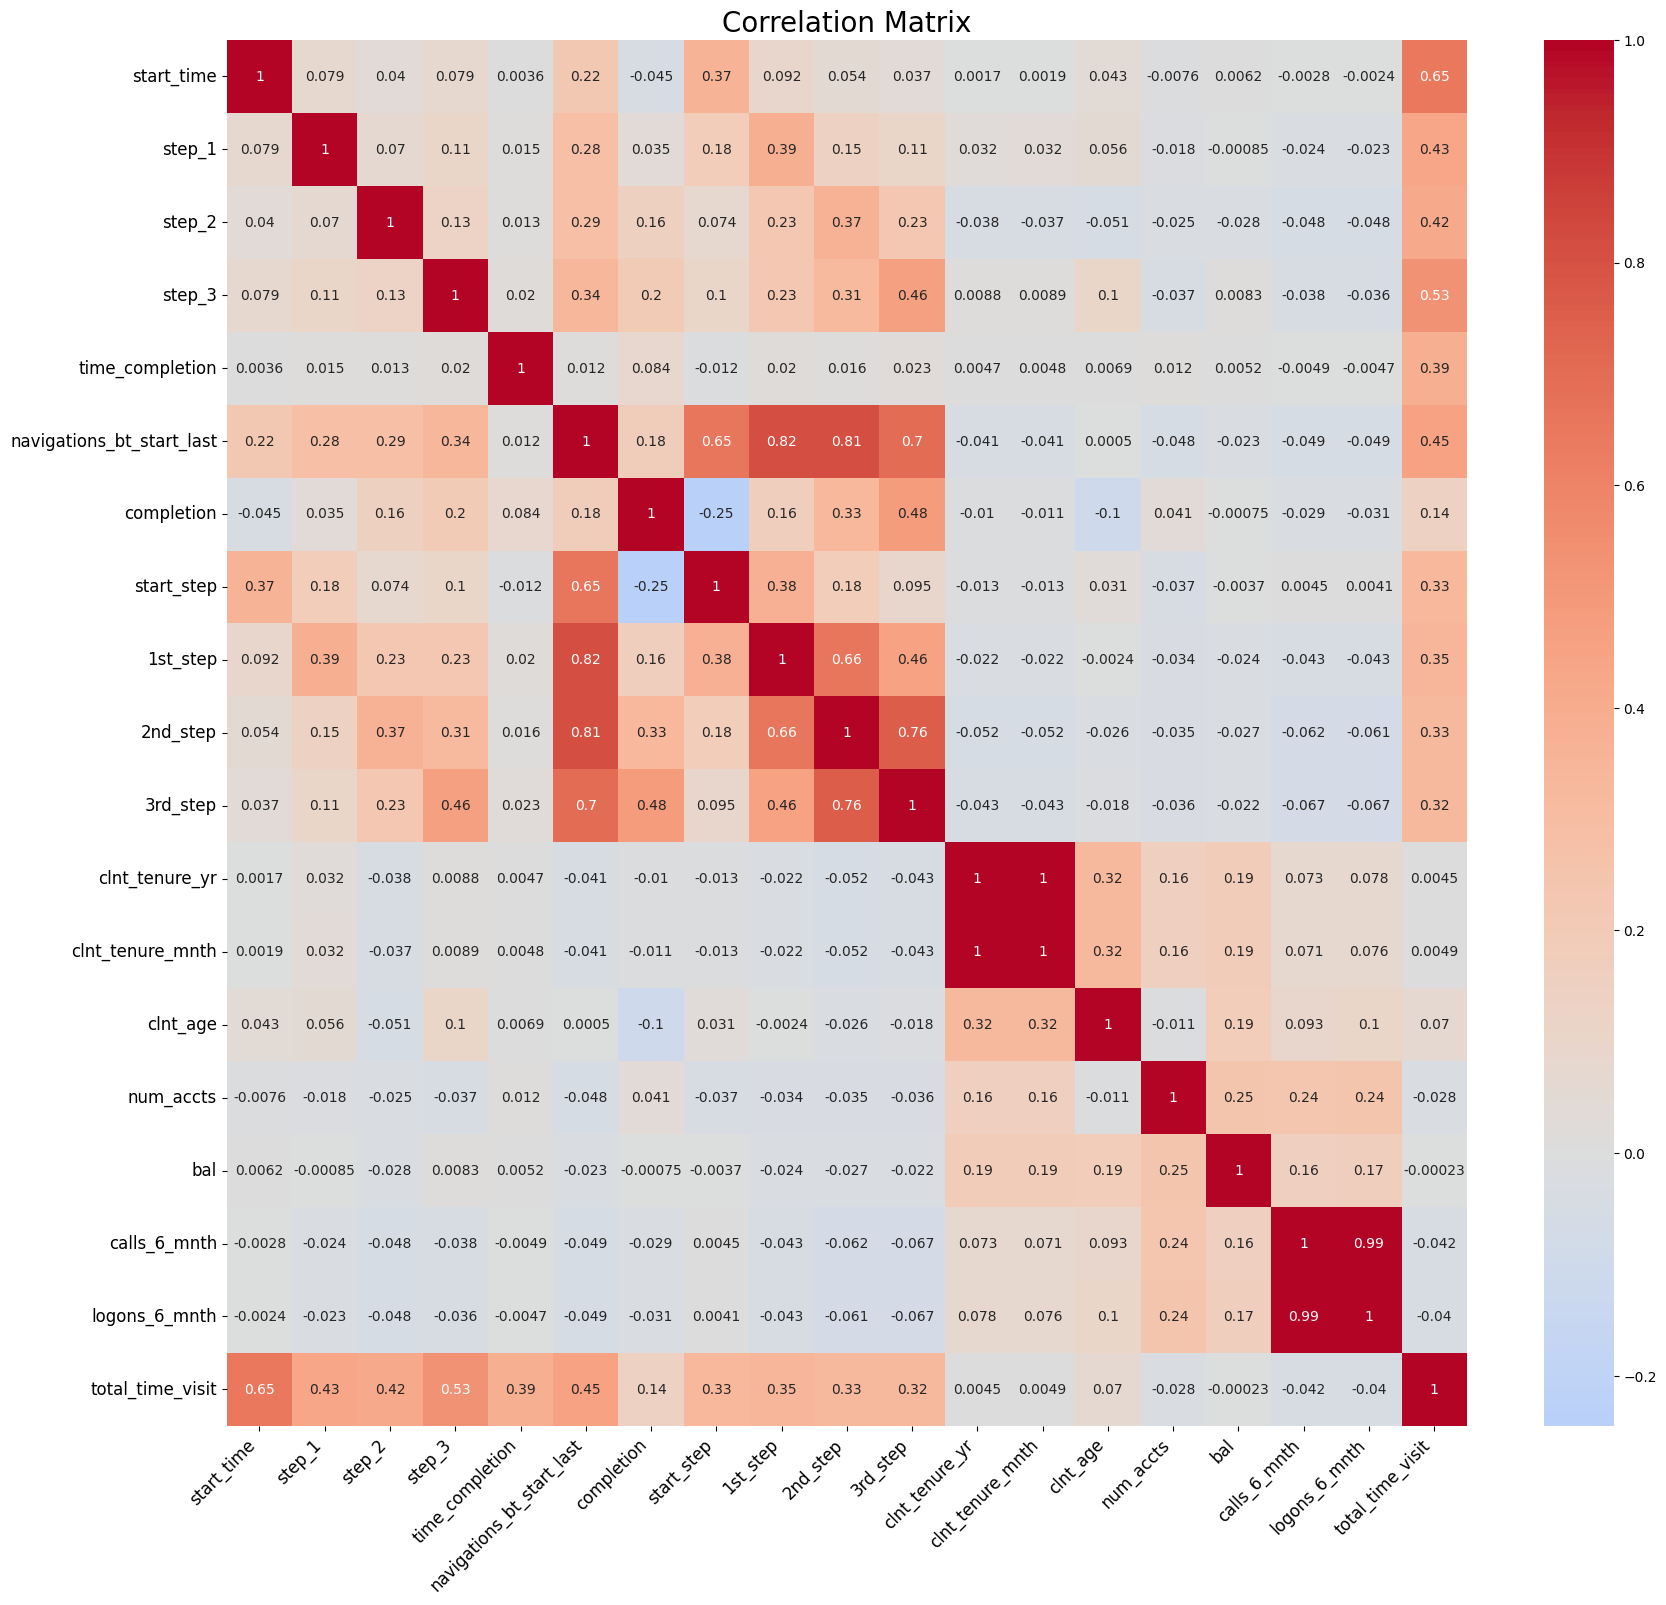

In [4]:
correlation_matrix = df_final.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(20, 18))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, annot_kws={"size": 10})  # Adjust font size
plt.title('Correlation Matrix', fontsize=20)  # Adjust title font size
plt.xticks(rotation=45, ha='right', fontsize=12)  # Adjust x-axis tick labels
plt.yticks(rotation=0, fontsize=12)  # Adjust y-axis tick labels
plt.show()

### Strong Positive Correlations
Calls in Last 6 Months vs. Logons in Last 6 Months (0.99)
This very high correlation indicates that clients who make more calls also tend to log in more frequently.
Navigations Between Start and Last vs. 1st Step (0.81)
Clients who navigate between the start and last step frequently also spend significant time on the 1st step.
Navigations Between Start and Last vs. 2nd Step (0.76)
Similarly, clients who navigate a lot between the start and last steps also spend more time on the 2nd step.
Navigations Between Start and Last vs. 3rd Step (0.71)
There is also a strong correlation indicating that frequent navigators also spend time on the 3rd step.
Total Time Visit vs. Start Time (0.65)
Clients who spend more time on their total visit tend to start earlier.
### Moderate Positive Correlations
Step 1 vs. Step 2 (0.37)
A moderate correlation indicating that clients who complete Step 1 are likely to proceed to Step 2.
Step 1 vs. Step 3 (0.31)
Indicates that clients who complete Step 1 are likely to proceed to Step 3 as well.
Client Age vs. Client Tenure Year (0.32)
Older clients tend to have been with the company for more years.
Number of Accounts vs. Balance (0.25)
Clients with more accounts tend to have a higher balance.
### Strong Negative Correlations
Step 2 vs. Client Tenure Year (-0.38)
Indicates that newer clients are more likely to complete Step 2.
3rd Step vs. Client Tenure Year (-0.43)
Indicates that newer clients are more likely to complete the 3rd step.
### Insights:
Client Engagement:
Clients who make more calls are also the ones who log in more frequently, suggesting that these clients are more engaged.
The time spent on each step correlates positively with navigations between start and last step, indicating that clients who spend more time are thorough in their actions.
New vs. Long-term Clients:
There is a negative correlation between client tenure and the completion of later steps, suggesting that newer clients are more active in completing steps.
Older Clients:
Older clients tend to spend more time on the site and have a longer tenure with the company.
Balance and Accounts:
Clients with more accounts tend to have a higher balance, indicating that diversifying accounts may be a strategy for wealthier clients.

#### Listing of variables corelated with completion variable with their corelation coefficient and p-values

In [5]:
import pandas as pd
    
# function for calculating pearson correlation coefficient and p-value between 'completion' and other  'numerical variables'

def calculate_correlation(df, var1, var2):
    correlation_coef, p_value = pearsonr(df[var1], df[var2])
    return correlation_coef, p_value

# Calculate correlation coefficient and p-value for 'navigations_bt_start_last' and 'completion'
correlation_coef_tn, p_value_tn = calculate_correlation(df_final, 'navigations_bt_start_last', 'completion')

# Calculate correlation coefficient and p-value for 'start_step' and 'completion'
correlation_coef_ss, p_value_ss = calculate_correlation(df_final, 'start_step', 'completion')

# Calculate correlation coefficient and p-value for 'total_time_visit' and 'completion'
correlation_coef_ttv, p_value_ttv = calculate_correlation(df_final, 'total_time_visit', 'completion')

# Calculate correlation coefficient and p-value for 'clnt_tenure_yr' and 'completion'
correlation_coef_cty, p_value_cty = calculate_correlation(df_final, 'clnt_tenure_yr', 'completion')

# Calculate correlation coefficient and p-value for 'clnt_age' and 'completion'
correlation_coef_ca, p_value_ca = calculate_correlation(df_final, 'clnt_age', 'completion')

# Calculate correlation coefficient and p-value for 'num_accts' and 'completion'
correlation_coef_na, p_value_na = calculate_correlation(df_final, 'num_accts', 'completion')

# Calculate correlation coefficient and p-value for 'calls_6_mnth' and 'completion'
correlation_coef_c6m, p_value_c6m = calculate_correlation(df_final, 'calls_6_mnth', 'completion')

# Calculate correlation coefficient and p-value for 'logons_6_mnth' and 'completion'
correlation_coef_l6m, p_value_l6m = calculate_correlation(df_final, 'logons_6_mnth', 'completion')

# Create a dictionary with the correlation coefficient and p-value for each variable
correlation_data = {
    'Variable': ['navigations_bt_start_last', 'start_step', 'total_time_visit', 'clnt_tenure_yr', 'clnt_age', 'num_accts', 'calls_6_mnth', 'logons_6_mnth'],
    'Correlation Coefficient': [correlation_coef_tn, correlation_coef_ss, correlation_coef_ttv, correlation_coef_cty, correlation_coef_ca, correlation_coef_na, correlation_coef_c6m, correlation_coef_l6m],
    'P-value': [p_value_tn, p_value_ss, p_value_ttv, p_value_cty, p_value_ca, p_value_na, p_value_c6m, p_value_l6m]
}

# Create a DataFrame from the correlation data
correlation_table = pd.DataFrame(correlation_data)

# Print the correlation table
correlation_table

,Variable,Correlation Coefficient,P-value
0,navigations_bt_start_last,0.177062,0.000000e+00
1,start_step,-0.245065,0.000000e+00
2,total_time_visit,0.144415,3.934739e-320
3,clnt_tenure_yr,-0.009964,8.652253e-03
4,clnt_age,-0.101164,2.518124e-157
5,num_accts,0.040581,1.054599e-26
6,calls_6_mnth,-0.029097,1.743391e-14
7,logons_6_mnth,-0.030715,5.732490e-16


In [6]:
df_final.columns

Index(['client_id', 'visit_visitor_id', 'start_time', 'step_1', 'step_2',
       'step_3', 'time_completion', 'navigations_bt_start_last', 'completion',
       'start_step', '1st_step', '2nd_step', '3rd_step', 'last_step',
       'variation', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'date',
       'initial_date', 'total_time_visit', 'final_date'],
      dtype='object')

## Statistical Tests

### Perform statistical tests to quantify the relationship between variables

## Hypothesis testing

Test for Difference in Average Age
Hypothesis:
Null Hypothesis : The average age of clients engaging with the new process (Test) is the same as the average age of clients engaging with the old process (Control).
Alternative Hypothesis : The average age of clients engaging with the new process (Test) is different from the average age of clients engaging with the old process (Control).

In [7]:
from scipy.stats import ttest_ind

# Extract ages for each group
test_age = df_final[df_final['variation'] == 'Test']['clnt_age']
control_age = df_final[df_final['variation'] == 'Control']['clnt_age']

# Perform t-test
t_stat_age, p_value_age = ttest_ind(test_age, control_age)
print(f'Age t-statistic: {t_stat_age}, p-value: {p_value_age}')

Age t-statistic: -1.2729794502698868, p-value: 0.20302959685301533


The average age of clients in the Test group is not significantly different from the average age of clients in the Control group.

2. Test for Difference in Average Client Tenure
Hypothesis:
Null Hypothesis: The average client tenure of those engaging with the new process (Test) is the same as those engaging with the old process (Control).
Alternative Hypothesis: The average client tenure of those engaging with the new process (Test) is different from those engaging with the old process (Control).

In [8]:
# Extract tenures for each group
test_tenure = df_final[df_final['variation'] == 'Test']['clnt_tenure_yr']
control_tenure = df_final[df_final['variation'] == 'Control']['clnt_tenure_yr']

# Perform t-test
t_stat_tenure, p_value_tenure = ttest_ind(test_tenure, control_tenure)
print(f'Tenure t-statistic: {t_stat_tenure}, p-value: {p_value_tenure}')

Tenure t-statistic: -0.05808470998152816, p-value: 0.953681320670213


The average tenure of clients in the Test group is not significantly different from the average tenure of clients in the Control group.

3. Test for Gender Differences in Engagement
Hypothesis:

Null Hypothesis: Gender does not affect the likelihood of engaging with the new process (Test) or the old process (Control).
Alternative Hypothesis: Gender affects the likelihood of engaging with the new process (Test) or the old process (Control).

In [9]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table_gender_process = pd.crosstab(df_final['gendr'], df_final['variation'])

# Perform Chi-Square test
chi2_stat_gender, p_value_gender, dof, ex = chi2_contingency(contingency_table_gender_process)
print(contingency_table_gender_process), print(f'Chi-square statistic for gender and process: {chi2_stat_gender}, p-value: {p_value_gender}')

variation  Control   Test
gendr                    
F            10442  12195
M            11094  12661
Other        10699  12334
Chi-square statistic for gender and process: 1.539161404659761, p-value: 0.46320724931898305


(None, None)

Gender does not appear to have a significant effect on whether clients engage with the new process (Test) or the old process (Control).

Test for completion rate

In [10]:
completion_table = pd.crosstab(df_final['variation'], df_final['completion'])

# Perform Chi-Square test
chi2_stat_completion, p_value_completion, dof, ex = chi2_contingency(completion_table)
print(f'Chi-square statistic for completion rates: {chi2_stat_completion}, p-value: {p_value_completion}')

Chi-square statistic for completion rates: 525.6875674507415, p-value: 2.449904079356561e-116


The completion rates for clients engaging with the new process (Test) are statistically significantly different from those engaging with the old process (Control).

In [11]:
completion_rates = df_final.groupby('variation')['completion'].mean()
print(completion_rates)

variation
Control    0.498868
Test       0.585776
Name: completion, dtype: float64


### Testing the Hypothesis ensuring that the observed increase in completion rate from the A/B test meets or exceeds this 5% threshold.

In [12]:
# Calculate Completion Rates
completion_rates = df_final.groupby('variation')['completion'].mean()
completion_rate_test = completion_rates.get('Test', 0)
completion_rate_control = completion_rates.get('Control', 0)

In [13]:
# Calculate the percentage increase
if completion_rate_control != 0:
    percentage_increase = ((completion_rate_test - completion_rate_control) / completion_rate_control) * 100
else:
    percentage_increase = float('inf')  # Handle division by zero case

print(f'Completion rate for Test group: {completion_rate_test}')
print(f'Completion rate for Control group: {completion_rate_control}')
print(f'Percentage increase in completion rate: {percentage_increase}%')

Completion rate for Test group: 0.5857757461683248
Completion rate for Control group: 0.49886769039863504
Percentage increase in completion rate: 17.421063228256642%


Set up the Hypotheses:

Null Hypothesis (H0): The increase in completion rate is less than 5%.
Alternative Hypothesis (H1): The increase in completion rate is at least 5%.


In [14]:
# Perform the Two-Proportion Z-Test:
from statsmodels.stats.proportion import proportions_ztest

# Define number of successes (completed visits) and number of trials (total visits) for both groups
num_success_test = df_final[df_final['variation'] == 'Test']['completion'].sum()
num_trials_test = len(df_final[df_final['variation'] == 'Test'])
num_success_control = df_final[df_final['variation'] == 'Control']['completion'].sum()
num_trials_control = len(df_final[df_final['variation'] == 'Control'])

# Perform the two-proportion z-test
successes = [num_success_test, num_success_control]
trials = [num_trials_test, num_trials_control]
z_stat, p_value = proportions_ztest(successes, trials)

print(f'Two-proportion z-test statistic: {z_stat}')
print(f'p-value: {p_value}')

Two-proportion z-test statistic: 22.935519051858822
p-value: 2.0554268392884194e-116


In [15]:
# Define the threshold for percentage increase
threshold = 5.0

# Check if the observed percentage increase meets or exceeds the threshold
if percentage_increase >= threshold:
    print('The observed increase in completion rate meets or exceeds the 5% threshold.')
else:
    print('The observed increase in completion rate does not meet the 5% threshold.')

# Interpret the p-value
if p_value < 0.05:
    print('The increase in completion rate is statistically significant.')
else:
    print('The increase in completion rate is not statistically significant.')

The observed increase in completion rate meets or exceeds the 5% threshold.
The increase in completion rate is statistically significant.


#### Hypothesis on tottal time spent

In [16]:
# Extract total time visit for each group
test_time = df_final[df_final['variation'] == 'Test']['total_time_visit']
control_time = df_final[df_final['variation'] == 'Control']['total_time_visit']

# Perform t-test
t_stat_time, p_value_time = ttest_ind(test_time, control_time)
print(f'Total time visit t-statistic: {t_stat_time}, p-value: {p_value_time}')

Total time visit t-statistic: 8.190889099465572, p-value: 2.6366449606538235e-16


Reject the null hypothesis. This suggests that there is a statistically significant difference in the total time spent on the site between clients in the Test group (new process) and clients in the Control group (old process).

#### Hypothesis on Number of Accounts


Hypothesis: The average number of accounts is the same for clients engaging with the new process (Test) and those engaging with the old process (Control).
Alternative Hypothesis: The average number of accounts is different for clients engaging with the new process and those engaging with the old process.
Test: t-Test for independent samples.



In [17]:

# Extract number of accounts for each group
test_accounts = df_final[df_final['variation'] == 'Test']['num_accts']
control_accounts = df_final[df_final['variation'] == 'Control']['num_accts']
# Perform t-test
t_stat_accounts, p_value_accounts = ttest_ind(test_accounts, control_accounts)
print(f'Number of accounts t-statistic: {t_stat_accounts}, p-value: {p_value_accounts}')

Number of accounts t-statistic: -2.39607455298703, p-value: 0.016574349209449127


Reject the null hypothesis. This indicates that there is a statistically significant difference in the number of accounts between the Test group and the Control group.

Hypothesis: The average logons is the same for clients engaging with the new process (Test) and those engaging with the old process (Control).
Alternative Hypothesis: The average logons is different for clients engaging with the new process and those engaging with the old process.
Test: t-Test for independent samples.

In [18]:
test_logons = df_final[df_final['variation'] == 'Test']['logons_6_mnth']
control_logons = df_final[df_final['variation'] == 'Control']['logons_6_mnth']

# Perform t-test
t_stat_balances, p_value_balances = ttest_ind(test_logons, control_logons)
print(f'Balance t-statistic: {t_stat_balances}, p-value: {p_value_balances}')

Balance t-statistic: -3.196715530818049, p-value: 0.0013906417590579738


 Reject the null hypothesis. This implies that there is a statistically difference in the average balance between the Test group (new process) and the Control group (old process).

In [19]:
average_balance_test = df_final[df_final['variation'] == 'Test']['bal'].mean()
average_balance_control = df_final[df_final['variation'] == 'Control']['bal'].mean()

print(f'Average balance for Test group: {average_balance_test}')
print(f'Average balance for Control group: {average_balance_control}')

Average balance for Test group: 170146.67768674376
Average balance for Control group: 163113.4817937025


In [20]:
# Extract recent call activity for each group
test_calls = df_final[df_final['variation'] == 'Test']['calls_6_mnth']
control_calls = df_final[df_final['variation'] == 'Control']['calls_6_mnth']

# Perform t-test
t_stat_calls, p_value_calls = ttest_ind(test_calls, control_calls)
print(f'Calls in last 6 months t-statistic: {t_stat_calls}, p-value: {p_value_calls}')

Calls in last 6 months t-statistic: -3.318427950676876, p-value: 0.0009057220749475691


Reject the null hypothesis. This means that there is a statistically significant difference in the number of calls in the last 6 months between the Test group (new process) and the Control group (old process).

In [21]:
test_navigations = df_final[df_final['variation'] == 'Test']['navigations_bt_start_last']
control_navigations = df_final[df_final['variation'] == 'Control']['navigations_bt_start_last']

In [22]:
t_stat_navigations, p_value_navigations = ttest_ind(test_navigations, control_navigations)
print(f'Navigations between start and last t-statistic: {t_stat_navigations}, p-value: {p_value_navigations}')

Navigations between start and last t-statistic: 8.702182915655731, p-value: 3.3252860422972968e-18


reject the null hypothesis. This means that there is a statistically significant difference in the number of navigations between the Test and Control groups.

Contextualize Findings:
If the Test group has more navigations: This might indicate increased user activity or engagement with the new process.
If the Test group has fewer navigations: This could suggest that the new process is more efficient or requires fewer steps.
Needs further investigations

### Hypothesis Testing for error rates

Hypothesis:

Null Hypothesis (H0): There is no significant difference in the error rates between the Test and Control groups.
Alternative Hypothesis (H1): There is a significant difference in the error rates between the Test and Control groups.

In [23]:
import pandas as pd
from scipy.stats import chi2_contingency

# Example DataFrame creation (replace with actual data loading code)
# df_combined = pd.read_csv('your_file.csv')

# Convert date_time to pandas datetime format
df_combined['date_time'] = pd.to_datetime(df_combined['date_time'])

# Sort by client_id and date_time
df_combined = df_combined.sort_values(by=['client_id', 'date_time'])

# Calculate the time difference to the previous step
df_combined['time_to_previous_step'] = df_combined.groupby('client_id')['date_time'].diff().dt.total_seconds()

# Identify errors: going back to any previous step in less than 30 seconds
df_combined['is_error'] = df_combined['time_to_previous_step'] < 30

# Count errors and non-errors
errors_test = df_combined[(df_combined['Variation'] == 'Test') & (df_combined['is_error'])].shape[0]
non_errors_test = df_combined[(df_combined['Variation'] == 'Test') & (~df_combined['is_error'])].shape[0]

errors_control = df_combined[(df_combined['Variation'] == 'Control') & (df_combined['is_error'])].shape[0]
non_errors_control = df_combined[(df_combined['Variation'] == 'Control') & (~df_combined['is_error'])].shape[0]

# Calculate total observations for each group
total_test = errors_test + non_errors_test
total_control = errors_control + non_errors_control

# Compute error rates
error_rate_test = errors_test / total_test if total_test > 0 else 0
error_rate_control = errors_control / total_control if total_control > 0 else 0

# Print error rates
print(f'Error rate for Test group: {error_rate_test:.4f}')
print(f'Error rate for Control group: {error_rate_control:.4f}')

# Create a contingency table
contingency_table = [
    [errors_test, non_errors_test],  # Test group
    [errors_control, non_errors_control]  # Control group
]

# Perform the Chi-Square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2_stat:.4f}, p-value: {p_value:.4f}')

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in error rates between the Test and Control groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in error rates between the Test and Control groups.")

Error rate for Test group: 0.3626
Error rate for Control group: 0.3506
Chi-square statistic: 49.0335, p-value: 0.0000
Reject the null hypothesis. There is a significant difference in error rates between the Test and Control groups.


## Visualization of different parameters

In [24]:
filtered_df = df_final[(df_final['navigations_bt_start_last'] <= 30) & (df_final['completion'] == 1)]

# Calculate the frequency of 'navigations_bt_start_last' for each variation
freq = filtered_df.groupby('variation')['navigations_bt_start_last'].value_counts().unstack().fillna(0)

# Normalize the frequencies
norm_freq = freq.div(freq.sum(axis=1), axis=0)

# Reset index for plotting
norm_freq = norm_freq.reset_index()

# Melt DataFrame for easier plotting
norm_freq_melted = norm_freq.melt(id_vars='variation', var_name='Navigations', value_name='Normalized Frequency')
fig = go.Figure()

# Add traces for each variation
for variation in norm_freq_melted['variation'].unique():
    df_variation = norm_freq_melted[norm_freq_melted['variation'] == variation]
    fig.add_trace(go.Scatter(
        x=df_variation['Navigations'],
        y=df_variation['Normalized Frequency'],
        mode='lines+markers',
        name=variation
    ))

# Update layout
fig.update_layout(
    title='Total Navigations done bteween start and last page by ussrs who completed the process',
    xaxis_title='Navigations',
    yaxis_title='Normalized Frequency',
    legend_title='variation',
    template='plotly_white'
)

# Show plot
fig.show()

In [25]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Filter data for the first month
start_date = df_test_final['date'].min()
end_date = start_date + pd.DateOffset(days=30)

filtered_test_df = df_test_final[(df_test_final['date'] >= start_date) & (df_test_final['date'] < end_date)]
filtered_control_df = df_control_final[(df_control_final['date'] >= start_date) & (df_control_final['date'] < end_date)]

# Calculate daily completion rate for test data
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (First Month)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)

# Show the plot


In [26]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Calculate the start and end dates for the second month
start_date = df_test_final['date'].min()
end_first_month = start_date + pd.DateOffset(days=30)
start_second_month = end_first_month
end_second_month = start_second_month + pd.DateOffset(days=30)

# Filter data for the second month
filtered_test_df = df_test_final[(df_test_final['date'] >= start_second_month) & (df_test_final['date'] < end_second_month)]
filtered_control_df = df_control_final[(df_control_final['date'] >= start_second_month) & (df_control_final['date'] < end_second_month)]

# Calculate daily completion rate for test data
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (Second Month)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)


In [27]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Calculate the start and end dates for the third month
start_date = df_test_final['date'].min()
end_first_month = start_date + pd.DateOffset(days=30)
start_second_month = end_first_month
end_second_month = start_second_month + pd.DateOffset(days=30)
start_third_month = end_second_month
end_third_month = start_third_month + pd.DateOffset(days=30)

# Filter data for the third month
filtered_test_df = df_test_final[(df_test_final['date'] >= start_third_month) & (df_test_final['date'] < end_third_month)]
filtered_control_df = df_control_final[(df_control_final['date'] >= start_third_month) & (df_control_final['date'] < end_third_month)]

# Calculate daily completion rate for test data
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (Third Month)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)

# Show the plot


In [28]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Calculate the start and end dates for the three months
start_date = df_test_final['date'].min()
end_third_month = start_date + pd.DateOffset(days=90)

# Filter data for the three months
filtered_test_df = df_test_final[(df_test_final['date'] >= start_date) & (df_test_final['date'] < end_third_month)]
filtered_control_df = df_control_final[(df_control_final['date'] >= start_date) & (df_control_final['date'] < end_third_month)]

# Calculate daily completion rate for test data
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(shape='linear', color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(shape='linear', color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (Three Months)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)

# Show the plot


In [29]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Filter data where total_navigations is 3
filtered_test_df = df_test_final[df_test_final['navigations_bt_start_last'] == 3]
filtered_control_df = df_control_final[df_control_final['navigations_bt_start_last'] == 3]

# Calculate daily completion rate for test data where total_navigations is 3
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data where total_navigations is 3
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(shape='linear', color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(shape='linear', color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (Total Navigations = 3)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)

# Show the plot

In [30]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Filter data where total_navigations is 3
filtered_test_df = df_test_final[df_test_final['navigations_bt_start_last'] == 5]
filtered_control_df = df_control_final[df_control_final['navigations_bt_start_last'] == 5]

# Count occurrences of total_navigations = 3 by date for test data
counts_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date).size()

# Count occurrences of total_navigations = 3 by date for control data
counts_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date).size()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=counts_test.index,
    y=counts_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(shape='linear', color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=counts_control.index,
    y=counts_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(shape='linear', color='red')
))

# Update layout
fig.update_layout(
    title='Frequency of Total steps taken = 5 by Date',
    xaxis_title='Date',
    yaxis_title='Frequency of Total steps taken = 5',
    legend_title_text='Data Source'
)

# Show the plot


In [31]:
df_test['date_time'] = pd.to_datetime(df_test['date_time'])
df_control['date_time'] = pd.to_datetime(df_control['date_time'])

# Function to calculate error rate and completion rate
def calculate_rates(df):
    # Sort the dataframe by 'visit_id' and 'date_time'
    df = df.sort_values(by=['visit_id', 'date_time'])
    
    # Calculate the time difference between steps
    df['time_diff'] = df.groupby('visit_id')['date_time'].diff().dt.total_seconds()
    
    # Identify completions (where process step is 'confirm')
    df['completion'] = df['process_step'] == 'confirm'
    
    # Convert 'process_step' to a category type and then to codes for numerical comparison
    df['process_step_code'] = df['process_step'].astype('category').cat.codes
    
    # Identify errors (going back to the previous step in less than 5 seconds)
    df['error'] = (df['time_diff'] < 30) & (df['process_step_code'].diff() < 0)
    
    # Calculate the daily error rate
    error_rate = df.groupby(df['date_time'].dt.date)['error'].mean()
    
    # Calculate the daily completion rate
    completion_rate = df.groupby(df['date_time'].dt.date)['completion'].mean()
    
    return error_rate, completion_rate

# Calculate rates for test data
error_rate_test, completion_rate_test = calculate_rates(df_test)

# Calculate rates for control data
error_rate_control, completion_rate_control = calculate_rates(df_control)

# Create a scatter plot with lines for error rate vs. completion rate
fig = go.Figure()

# Line+scatter for test data error rate
fig.add_trace(go.Scatter(
    x=error_rate_test.index,
    y=error_rate_test.values,
    mode='lines+markers',
    name='Test Data Error Rate',
    line=dict(shape='linear', color='red')
))

# Line+scatter for test data completion rate
fig.add_trace(go.Scatter(
    x=completion_rate_test.index,
    y=completion_rate_test.values,
    mode='lines+markers',
    name='Test Data Completion Rate',
    line=dict(shape='linear', color='blue')
))

# Line+scatter for control data error rate
fig.add_trace(go.Scatter(
    x=error_rate_control.index,
    y=error_rate_control.values,
    mode='lines+markers',
    name='Control Data Error Rate',
    line=dict(shape='linear', color='orange')
))

# Line+scatter for control data completion rate
fig.add_trace(go.Scatter(
    x=completion_rate_control.index,
    y=completion_rate_control.values,
    mode='lines+markers',
    name='Control Data Completion Rate',
    line=dict(shape='linear', color='green')
))

# Update layout
fig.update_layout(
    title='Completion Rate vs. Error Rate (Test and Control Data)',
    xaxis_title='Date',
    yaxis_title='Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Rate Type'
)

# Show the plot

In [32]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Calculate rates for test and control data (assuming you already have this part)

# Create a figure with two vertical subplots
fig = make_subplots(rows=2, cols=1, 
                  subplot_titles=("Error Rate", "Completion Rate"),
                  shared_xaxes=True,
                  vertical_spacing=0.1)

# Error Rate Graph
fig.add_trace(go.Scatter(
  x=error_rate_test.index,
  y=error_rate_test.values,
  mode='lines+markers',
  name='Test Data Error Rate',
  line=dict(shape='linear', color='red')
), row=1, col=1)

fig.add_trace(go.Scatter(
  x=error_rate_control.index,
  y=error_rate_control.values,
  mode='lines+markers',
  name='Control Data Error Rate',
  line=dict(shape='linear', color='orange')
), row=1, col=1)

# Completion Rate Graph
fig.add_trace(go.Scatter(
  x=completion_rate_test.index,
  y=completion_rate_test.values,
  mode='lines+markers',
  name='Test Data Completion Rate',
  line=dict(shape='linear', color='blue')
), row=2, col=1)

fig.add_trace(go.Scatter(
  x=completion_rate_control.index,
  y=completion_rate_control.values,
  mode='lines+markers',
  name='Control Data Completion Rate',
  line=dict(shape='linear', color='green')
), row=2, col=1)

# Update layout
fig.update_layout(
  title_text="Error Rate and Completion Rate (Test and Control Data)",
  height=500,
  width=1800,
)

fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_yaxes(title_text="Error Rate", tickformat=".0%", row=1, col=1)
fig.update_yaxes(title_text="Completion Rate", tickformat=".0%", row=2, col=1)

# Show the figure
fig.show()

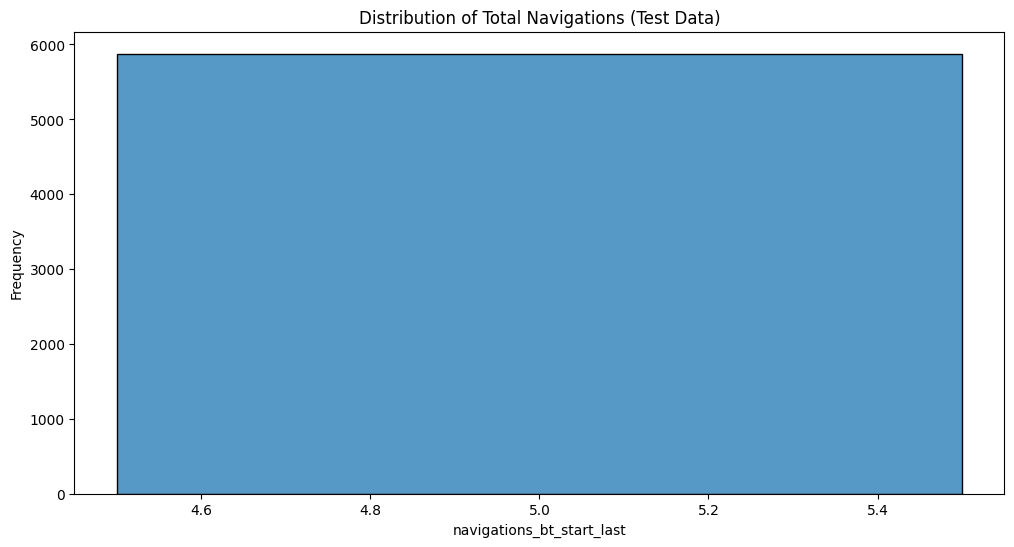

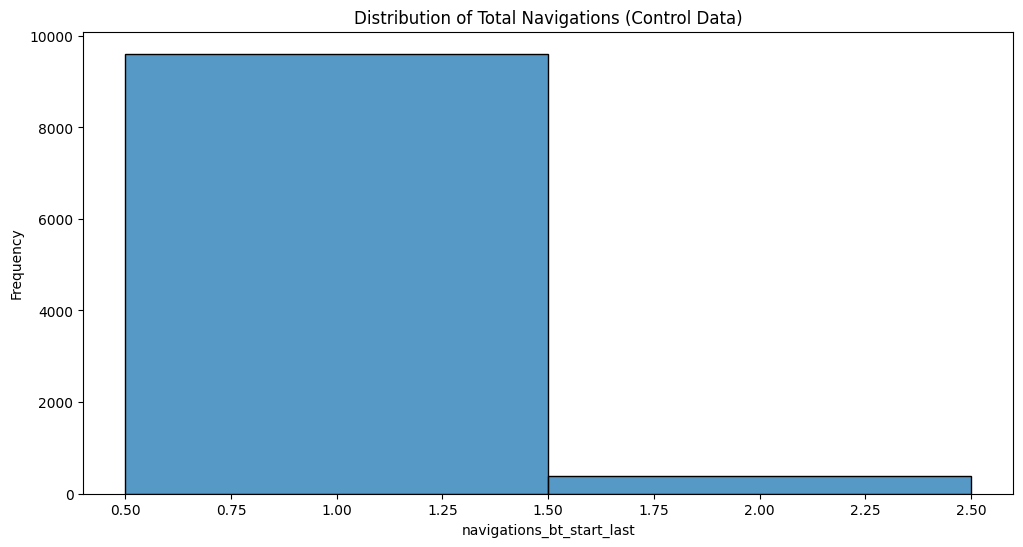

In [71]:
def plot_distribution(df, variable, title):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[variable], kde=False, discrete=True, bins=range(df[variable].max() + 1))
    plt.title(title)
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution for total navigations in both test and control datasets
plot_distribution(df_test_final, 'navigations_bt_start_last', 'Distribution of Total Navigations (Test Data)')
plot_distribution(df_control_final, 'navigations_bt_start_last', 'Distribution of Total Navigations (Control Data)')

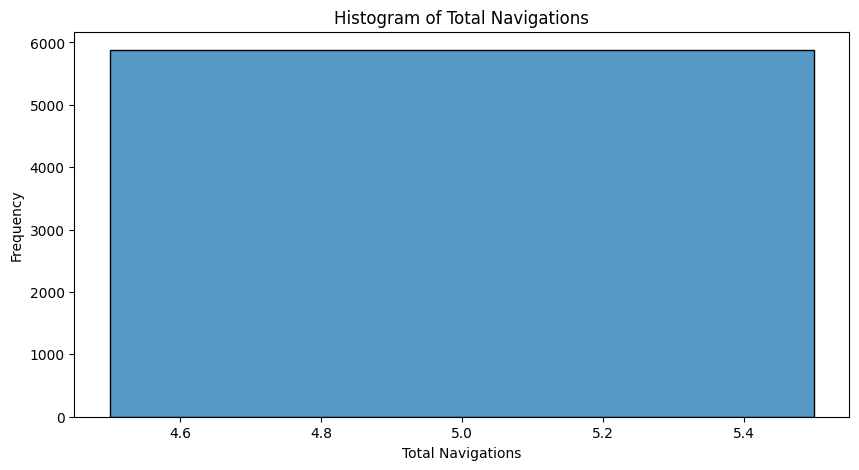

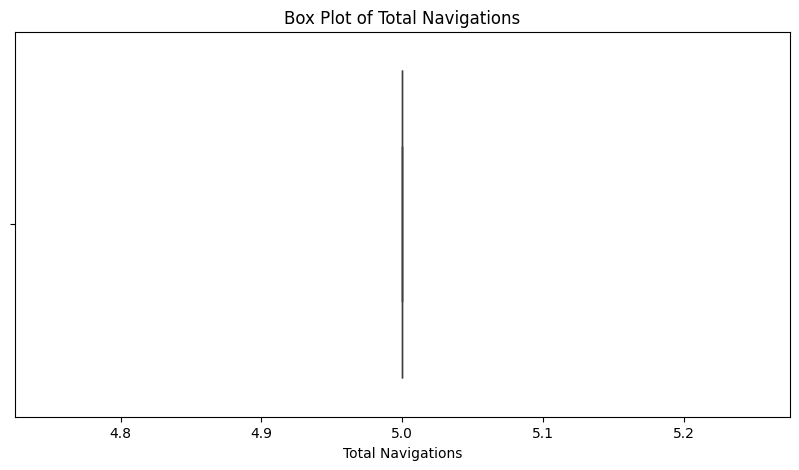

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_test_final['navigations_bt_start_last'], kde=False, discrete=True)
plt.title('Histogram of Total Navigations')
plt.xlabel('Total Navigations')
plt.ylabel('Frequency')
plt.show()

# Plot box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_test_final['navigations_bt_start_last'])
plt.title('Box Plot of Total Navigations')
plt.xlabel('Total Navigations')
plt.show()

In [35]:
# Log Transformation
df_test_final['log_total_navigations'] = np.log1p(df_test_final['navigations_bt_start_last'])

# Check normality again after transformation
stat, p = shapiro(df_test_final['log_total_navigations'])
print('Shapiro-Wilk Test after Log Transformation: Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Transformed sample looks Gaussian (fail to reject H0)')
else:
    print('Transformed sample does not look Gaussian (reject H0)')

Shapiro-Wilk Test after Log Transformation: Statistics=1.000, p=1.000
Transformed sample looks Gaussian (fail to reject H0)


/home/danicoco/Escritorio/IronHack-DataAnalysis/5. week-five/project_2/.venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: Input data has range zero. The results may not be accurate.

/home/danicoco/Escritorio/IronHack-DataAnalysis/5. week-five/project_2/.venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5878.



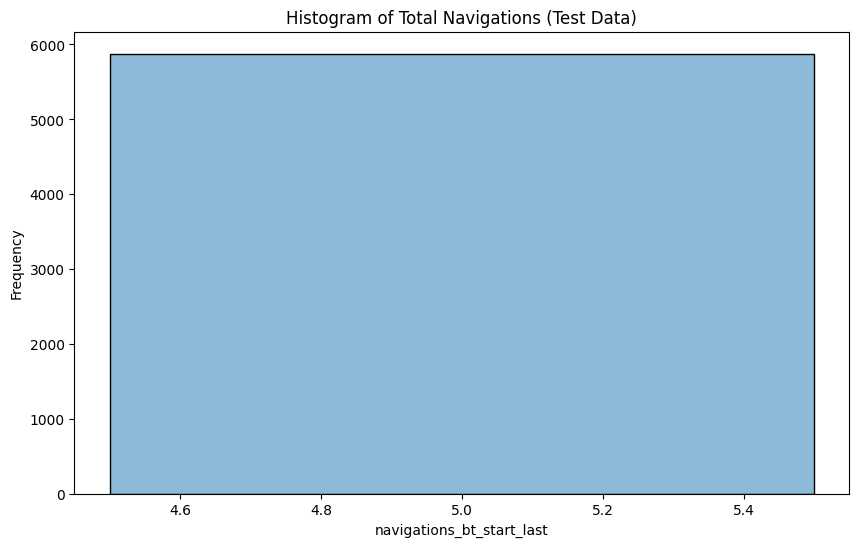

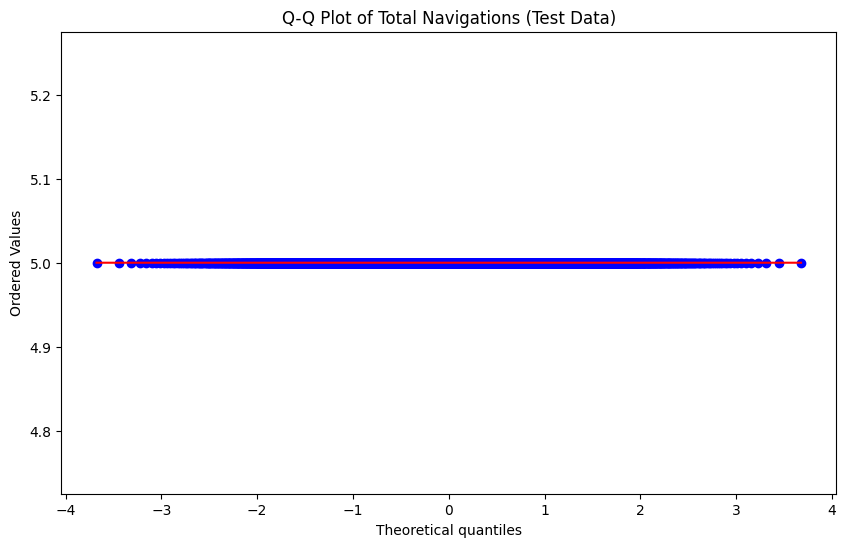

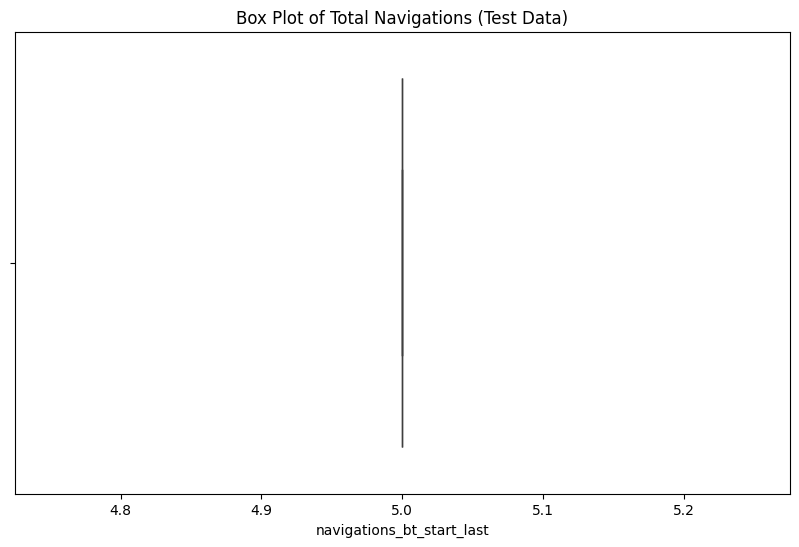

In [72]:
import scipy.stats as stats
def plot_histogram(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Q-Q Plot
def plot_qqplot(data, column, title):
    plt.figure(figsize=(10, 6))
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(title)
    plt.show()

# Box Plot
def plot_boxplot(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(title)
    plt.xlabel(column)
    plt.show()

# Plot for 'navigations_bt_start_last'
plot_histogram(df_test_final, 'navigations_bt_start_last', 'Histogram of Total Navigations (Test Data)')
plot_qqplot(df_test_final, 'navigations_bt_start_last', 'Q-Q Plot of Total Navigations (Test Data)')
plot_boxplot(df_test_final, 'navigations_bt_start_last', 'Box Plot of Total Navigations (Test Data)')

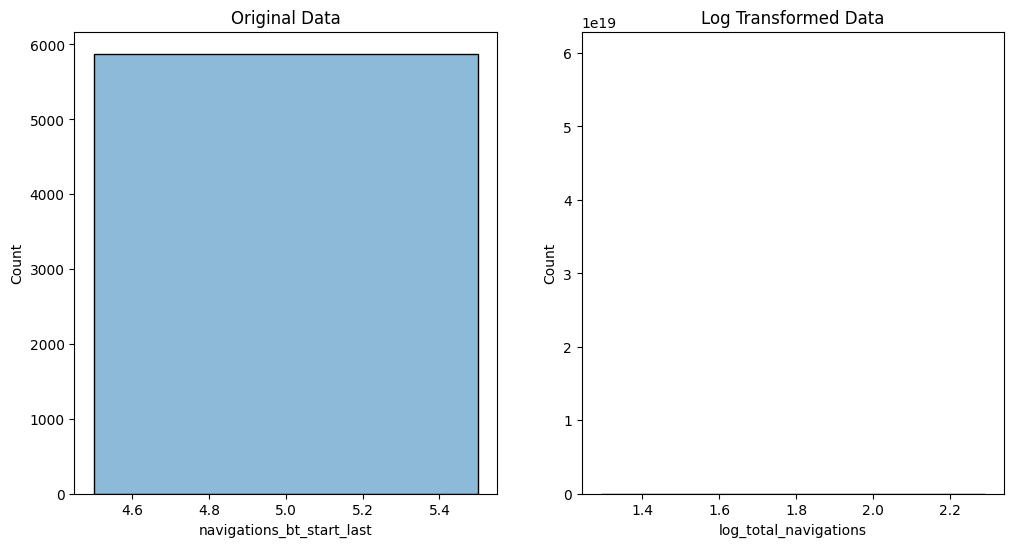

In [73]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_test_final['navigations_bt_start_last'], kde=True)
plt.title('Original Data')
plt.subplot(1, 2, 2)
sns.histplot(df_test_final['log_total_navigations'], kde=True)
plt.title('Log Transformed Data')
plt.show()

# Step by step EDA for numerical columns

In [38]:
from scipy.stats import shapiro
shapiro_test = shapiro(df_test_final['navigations_bt_start_last'])
print(shapiro_test)

ShapiroResult(statistic=1.0, pvalue=1.0)


/home/danicoco/Escritorio/IronHack-DataAnalysis/5. week-five/project_2/.venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: Input data has range zero. The results may not be accurate.

/home/danicoco/Escritorio/IronHack-DataAnalysis/5. week-five/project_2/.venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5878.



In [39]:
skewness = df_test_final['navigations_bt_start_last'].skew()
kurtosis = df_test_final['navigations_bt_start_last'].kurt()
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Skewness: 0.0, Kurtosis: 0.0


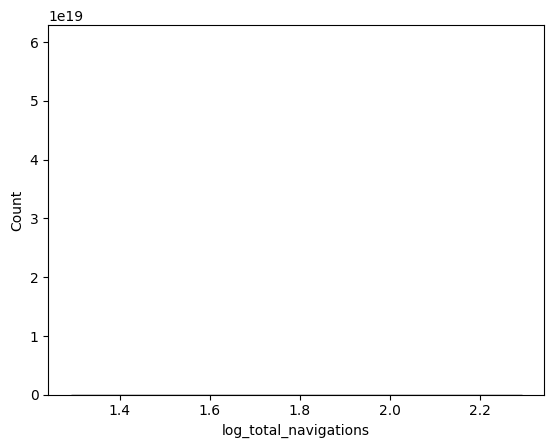

In [40]:
df_test_final['log_total_navigations'] = np.log(df_test_final['navigations_bt_start_last'] + 1)
sns.histplot(df_test_final['log_total_navigations'], kde=True)
plt.show()

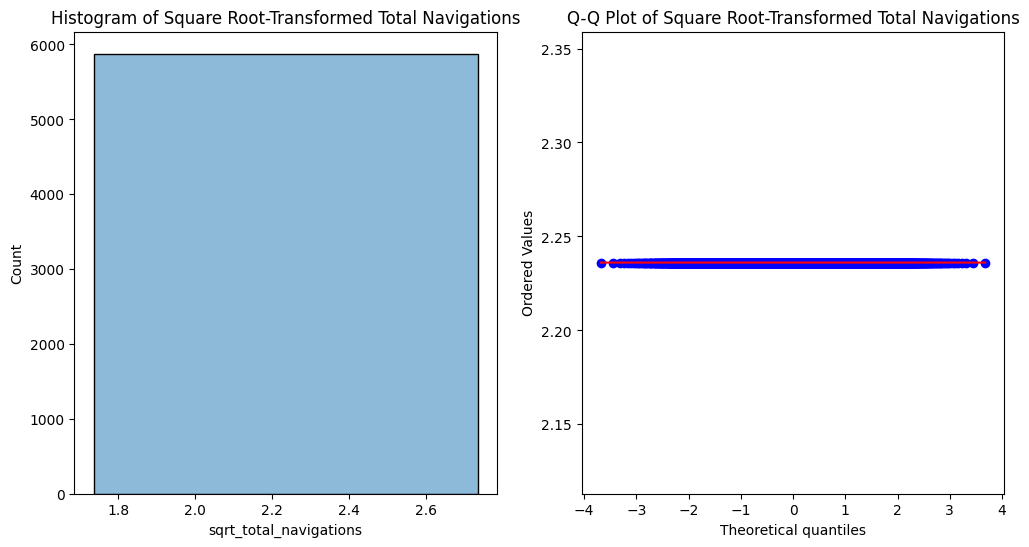

Shapiro-Wilk Test on Square Root-Transformed Data: Statistic=1.0, p-value=1.0


/home/danicoco/Escritorio/IronHack-DataAnalysis/5. week-five/project_2/.venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: Input data has range zero. The results may not be accurate.

/home/danicoco/Escritorio/IronHack-DataAnalysis/5. week-five/project_2/.venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5878.



In [41]:
df_test_final['sqrt_total_navigations'] = np.sqrt(df_test_final['navigations_bt_start_last'])

# Check distribution of square root-transformed total_navigations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_test_final['sqrt_total_navigations'], kde=True)
plt.title('Histogram of Square Root-Transformed Total Navigations')

plt.subplot(1, 2, 2)
stats.probplot(df_test_final['sqrt_total_navigations'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Square Root-Transformed Total Navigations')

plt.show()

# Perform Shapiro-Wilk test for normality on square root-transformed data
shapiro_test_sqrt = stats.shapiro(df_test_final['sqrt_total_navigations'])
print(f'Shapiro-Wilk Test on Square Root-Transformed Data: Statistic={shapiro_test_sqrt.statistic}, p-value={shapiro_test_sqrt.pvalue}')

95% Confidence Interval for the mean of total navigations: [5. 5.]


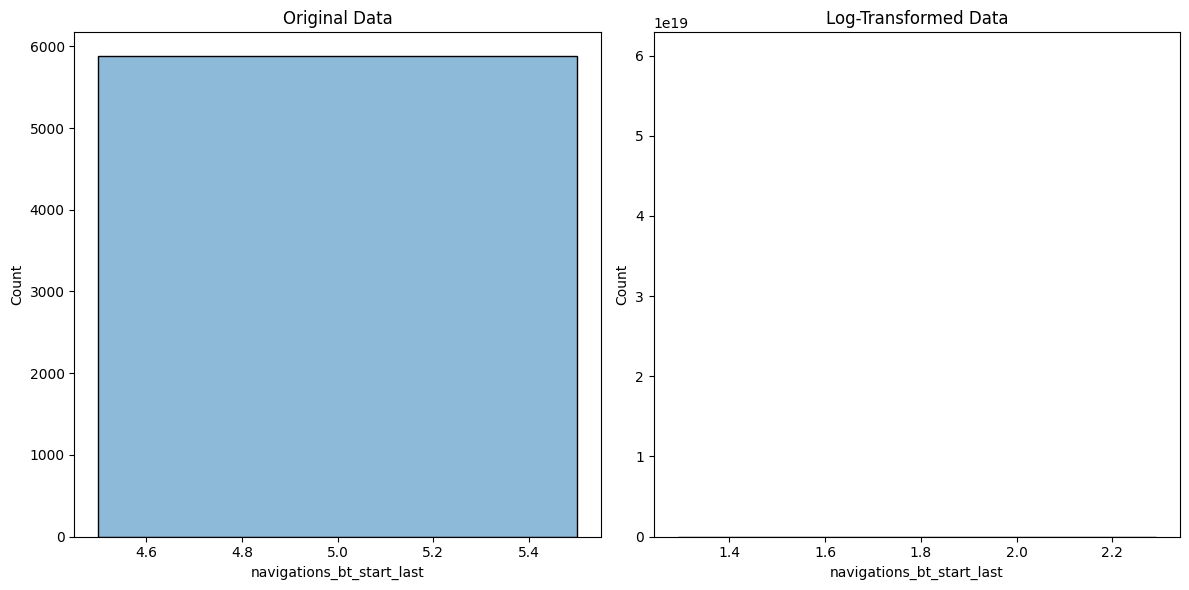

In [42]:
def bootstrap_statistic(data, n_iterations=1000, stat_function=np.mean):
    bootstrapped_stats = np.empty(n_iterations)
    for i in range(n_iterations):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_stats[i] = stat_function(sample)
    return bootstrapped_stats

# Bootstrapping the mean of total navigations
bootstrapped_means = bootstrap_statistic(df_test_final['navigations_bt_start_last'].dropna())

# Calculate confidence intervals
confidence_interval = np.percentile(bootstrapped_means, [2.5, 97.5])
print("95% Confidence Interval for the mean of total navigations:", confidence_interval)


import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df_test_final['navigations_bt_start_last'], ax=axes[0], kde=True)
axes[0].set_title('Original Data')

sns.histplot(np.log1p(df_test_final['navigations_bt_start_last']), ax=axes[1], kde=True)
axes[1].set_title('Log-Transformed Data')

plt.tight_layout()
plt.show()

95% Confidence Interval for the mean of total navigations: [5. 5.]


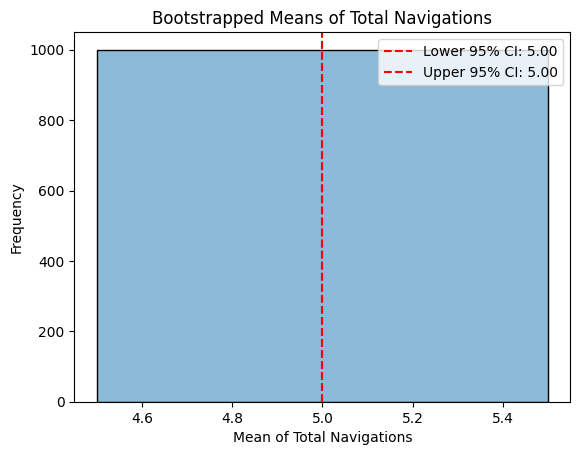

In [43]:
def bootstrap_statistic(data, n_iterations=1000, stat_function=np.mean):
    bootstrapped_stats = np.empty(n_iterations)
    for i in range(n_iterations):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_stats[i] = stat_function(sample)
    return bootstrapped_stats

# Calculate bootstrapped means
bootstrapped_means = bootstrap_statistic(df_test_final['navigations_bt_start_last'].dropna())

# Calculate 95% confidence intervals
confidence_interval = np.percentile(bootstrapped_means, [2.5, 97.5])
print("95% Confidence Interval for the mean of total navigations:", confidence_interval)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of bootstrapped means
sns.histplot(bootstrapped_means, kde=True)
plt.axvline(confidence_interval[0], color='red', linestyle='--', label=f'Lower 95% CI: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='red', linestyle='--', label=f'Upper 95% CI: {confidence_interval[1]:.2f}')
plt.title('Bootstrapped Means of Total Navigations')
plt.xlabel('Mean of Total Navigations')
plt.ylabel('Frequency')
plt.legend()
plt.show()

95% Confidence Interval for the mean of total navigations: [5.0, 5.0]


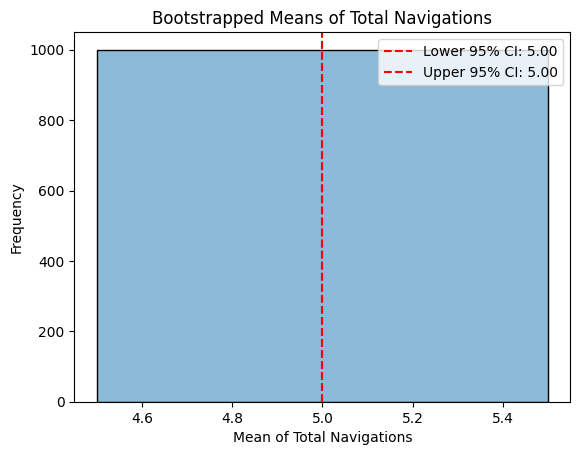

In [44]:
def bootstrap_mean(data, n_iterations=1000):
    boot_means = np.empty(n_iterations)
    for i in range(n_iterations):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means[i] = np.mean(sample)
    return boot_means

# Bootstrapped means for total_navigations
boot_means = bootstrap_mean(df_test_final['navigations_bt_start_last'].dropna())

# Calculate 95% confidence intervals
ci_low, ci_high = np.percentile(boot_means, [2.5, 97.5])
print(f'95% Confidence Interval for the mean of total navigations: [{ci_low}, {ci_high}]')

# Plotting the bootstrapped means
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(boot_means, kde=True)
plt.axvline(ci_low, color='red', linestyle='--', label=f'Lower 95% CI: {ci_low:.2f}')
plt.axvline(ci_high, color='red', linestyle='--', label=f'Upper 95% CI: {ci_high:.2f}')
plt.title('Bootstrapped Means of Total Navigations')
plt.xlabel('Mean of Total Navigations')
plt.ylabel('Frequency')
plt.legend()
plt.show()

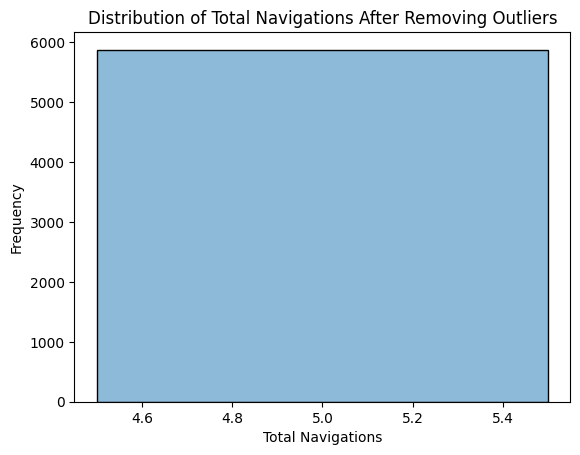

In [45]:
Q1 = df_test_final['navigations_bt_start_last'].quantile(0.25)
Q3 = df_test_final['navigations_bt_start_last'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_test_final_no_outliers = df_test_final[(df_test_final['navigations_bt_start_last'] >= lower_bound) & 
                                          (df_test_final['navigations_bt_start_last'] <= upper_bound)]

# Plotting the cleaned data
sns.histplot(df_test_final_no_outliers['navigations_bt_start_last'], kde=True)
plt.title('Distribution of Total Navigations After Removing Outliers')
plt.xlabel('Total Navigations')
plt.ylabel('Frequency')
plt.show()

### Experiment Design

Control Group Size: 9988
Test Group Size: 5868


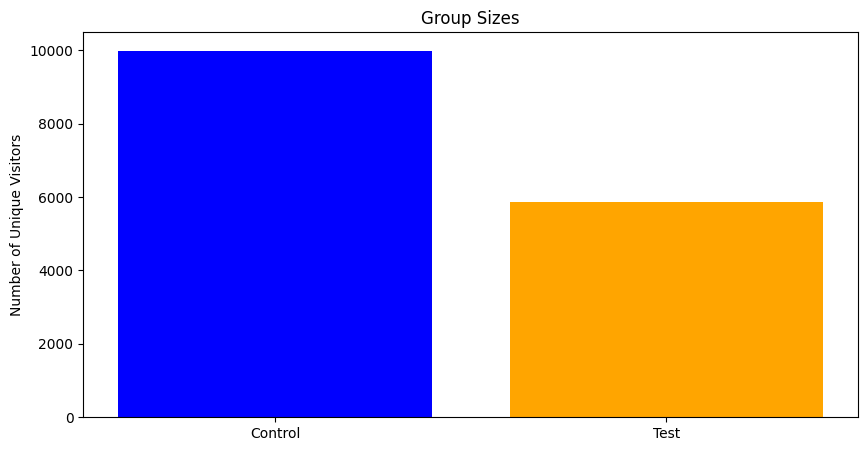

Gender Distribution Control:
 gendr
Other    0.391022
F        0.321836
M        0.287143
Name: proportion, dtype: float64
Gender Distribution Test:
 gendr
Other    0.390779
F        0.319496
M        0.289724
Name: proportion, dtype: float64


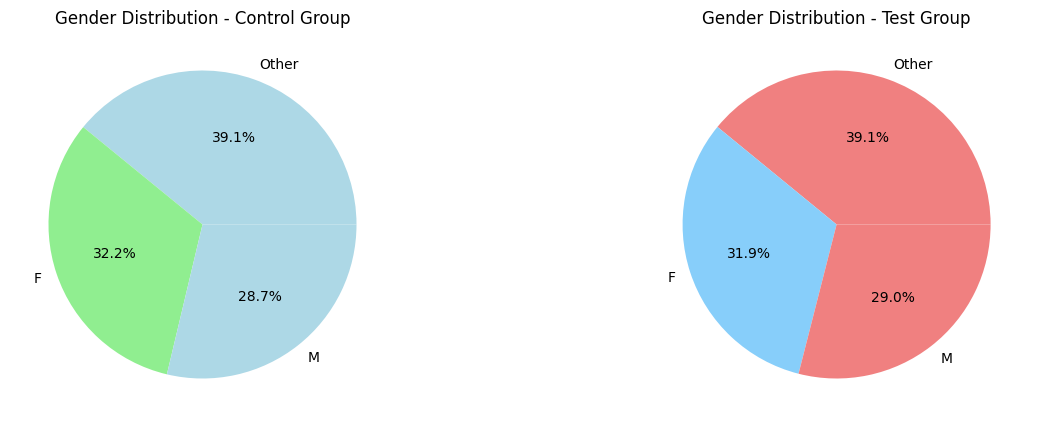

In [46]:


# Experiment Design Evaluation with Visualizations
def experiment_evaluation_with_visualizations(df_control, df_test):
    control_size = df_control['visit_visitor_id'].nunique()
    test_size = df_test['visit_visitor_id'].nunique()

    print("Control Group Size:", control_size)
    print("Test Group Size:", test_size)

    # Plot Group Sizes
    plt.figure(figsize=(10, 5))
    plt.bar(['Control', 'Test'], [control_size, test_size], color=['blue', 'orange'])
    plt.title('Group Sizes')
    plt.ylabel('Number of Unique Visitors')
    plt.show()

    # Gender Distribution
    gender_dist_control = df_control['gendr'].value_counts(normalize=True)
    gender_dist_test = df_test['gendr'].value_counts(normalize=True)

    print("Gender Distribution Control:\n", gender_dist_control)
    print("Gender Distribution Test:\n", gender_dist_test)

    # Plot Gender Distribution
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    axs[0].pie(gender_dist_control, labels=gender_dist_control.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
    axs[0].set_title('Gender Distribution - Control Group')

    axs[1].pie(gender_dist_test, labels=gender_dist_test.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
    axs[1].set_title('Gender Distribution - Test Group')

    plt.show()

experiment_evaluation_with_visualizations(df_control_final, df_test_final)


In [47]:
# Additional Data Needs
print("Additional data that could enhance the analysis:")
print("- Detailed logs of user interactions (e.g., clicks, hovers)")
print("- Feedback or survey data on user satisfaction")
print("- Data on external factors that could influence user behavior (e.g., marketing campaigns)")


Additional data that could enhance the analysis:
- Detailed logs of user interactions (e.g., clicks, hovers)
- Feedback or survey data on user satisfaction
- Data on external factors that could influence user behavior (e.g., marketing campaigns)


#### Listing of variables corelated with completion variable with their corelation coefficient and p-values

In [49]:
# Calculate correlation coefficient and p-value

correlations = {
    'Variable': ['navigations_bt_start_last', 'start_step', 'total_time_visit', 'clnt_tenure_yr', 'clnt_age', 'num_accts', 'calls_6_mnth', 'logons_6_mnth'],
    'Correlation Coefficient': [],
    'P-value': []
}

for var in correlations['Variable']:
    coef, p = calculate_correlation(df_final, var, 'completion')
    correlations['Correlation Coefficient'].append(coef)
    correlations['P-value'].append(p)
    
correlation_table = pd.DataFrame(correlations)

correlation_table

,Variable,Correlation Coefficient,P-value
0,navigations_bt_start_last,0.177062,0.000000e+00
1,start_step,-0.245065,0.000000e+00
2,total_time_visit,0.144415,3.934739e-320
3,clnt_tenure_yr,-0.009964,8.652253e-03
4,clnt_age,-0.101164,2.518124e-157
5,num_accts,0.040581,1.054599e-26
6,calls_6_mnth,-0.029097,1.743391e-14
7,logons_6_mnth,-0.030715,5.732490e-16


# Hypothesis testing

## 1. Test for Difference in Average Age
#### Null Hypothesis : The average age of clients engaging with the new process (Test) is the same as the average age of clients engaging with the old process (Control).
##### Alternative Hypothesis : The average age of clients engaging with the new process (Test) is different from the average age of clients engaging with the old process (Control).

In [50]:

test_age = df_final[df_final['variation'] == 'Test']['clnt_age']
control_age = df_final[df_final['variation'] == 'Control']['clnt_age']
t_stat_age, p_value_age = ttest_ind(test_age, control_age)
print(f'Age t-statistic: {t_stat_age}, p-value: {p_value_age}')

Age t-statistic: -1.2729794502698868, p-value: 0.20302959685301533


The average age of clients in the Test group is not significantly different from the average age of clients in the Control group.

## 2. Test for Difference in Average Client Tenure
### Null Hypothesis: The average client tenure of those engaging with the new process (Test) is the same as those engaging with the old process (Control).
### Alternative Hypothesis: The average client tenure of those engaging with the new process (Test) is different from those engaging with the old process (Control).

In [51]:
test_tenure = df_final[df_final['variation'] == 'Test']['clnt_tenure_yr']
control_tenure = df_final[df_final['variation'] == 'Control']['clnt_tenure_yr']
t_stat_tenure, p_value_tenure = ttest_ind(test_tenure, control_tenure)
print(f'Tenure t-statistic: {t_stat_tenure}, p-value: {p_value_tenure}')

Tenure t-statistic: -0.05808470998152816, p-value: 0.953681320670213


The average tenure of clients in the Test group is not significantly different from the average tenure of clients in the Control group.

## 3. Test for Gender Differences in Engagement
### Null Hypothesis: Gender does not affect the likelihood of engaging with the new process (Test) or the old process (Control).
### Alternative Hypothesis: Gender affects the likelihood of engaging with the new process (Test) or the old process (Control).

In [52]:
contingency_table_gender_process = pd.crosstab(df_final['gendr'], df_final['variation'])
chi2_stat_gender, p_value_gender, _, _ = chi2_contingency(contingency_table_gender_process)
print(f'Chi-square statistic for gender and process: {chi2_stat_gender}, p-value: {p_value_gender}')

Chi-square statistic for gender and process: 1.539161404659761, p-value: 0.46320724931898305


Gender does not appear to have a significant effect on whether clients engage with the new process (Test) or the old process (Control).

# Until here we can conclude that the test group and control group were very similar.

## 4. Test for completion rate

In [53]:
# Compute the contingency table
contingency_table = pd.crosstab(df_final['variation'], df_final['completion'])

# Perform the Chi-square test
chi2_stat_completion, p_value_completion, _, _ = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = contingency_table.sum().sum()  # Total number of observations
min_dimension = min(contingency_table.shape) - 1  # Minimum dimension - 1

cramers_v = np.sqrt((chi2_stat_completion / n) / min_dimension)

# Print the results
print(f'Chi-square statistic for completion rates: {chi2_stat_completion}, p-value: {p_value_completion}')
print(f"Cramér's V for the association between variation and completion: {cramers_v}")

Chi-square statistic for completion rates: 525.6875674507415, p-value: 2.449904079356561e-116
Cramér's V for the association between variation and completion: 0.0870173611252898


### Testing Hypothesis ensuring completion rate from the A/B test meets or exceeds this 5% threshold.

In [54]:
# Calculate Completion Rates
completion_rates = df_final.groupby('variation')['completion'].mean()
completion_rate_test = completion_rates.get('Test', 0)
completion_rate_control = completion_rates.get('Control', 0)
percentage_increase = ((completion_rate_test - completion_rate_control) / completion_rate_control) * 100 if completion_rate_control != 0 else float('inf')

print(f'Completion rate for Test group: {completion_rate_test}')
print(f'Completion rate for Control group: {completion_rate_control}')
print(f'Percentage increase in completion rate: {percentage_increase}%')

Completion rate for Test group: 0.5857757461683248
Completion rate for Control group: 0.49886769039863504
Percentage increase in completion rate: 17.421063228256642%


## 5. Set up the Hypotheses:

### Null Hypothesis (H0): The increase in completion rate is less than 5%.
### Alternative Hypothesis (H1): The increase in completion rate is at least 5%.


In [55]:
# Perform the Two-Proportion Z-Test:
from statsmodels.stats.proportion import proportions_ztest

# Define number of successes (completed visits) and number of trials (total visits) for both groups
num_success_test = df_final[df_final['variation'] == 'Test']['completion'].sum()
num_trials_test = len(df_final[df_final['variation'] == 'Test'])
num_success_control = df_final[df_final['variation'] == 'Control']['completion'].sum()
num_trials_control = len(df_final[df_final['variation'] == 'Control'])


# Perform the two-proportion z-test
successes = [num_success_test, num_success_control]
trials = [num_trials_test, num_trials_control]
z_stat, p_value = proportions_ztest(successes, trials)

z_stat, p_value = proportions_ztest([num_success_test, num_success_control], [num_trials_test, num_trials_control])
print(f'Two-proportion z-test statistic: {z_stat}, p-value: {p_value}')

Two-proportion z-test statistic: 22.935519051858822, p-value: 2.0554268392884194e-116


In [56]:
# Define the threshold for percentage increase
threshold = 5.0
if percentage_increase >= threshold:
    print('The observed increase in completion rate meets or exceeds the 5% threshold.')
else:
    print('The observed increase in completion rate does not meet the 5% threshold.')

if p_value < 0.05:
    print('The increase in completion rate is statistically significant.')
else:
    print('The increase in completion rate is not statistically significant.')


The observed increase in completion rate meets or exceeds the 5% threshold.
The increase in completion rate is statistically significant.


## 6. Hypothesis on tottal time spent

### Null Hypothesis (H0): Users who do not spend much time on the new design are more likely to confirm. 
### Alternative Hypothesis (H1): Users who spend more time on the new design are more likely to confirm.

In [57]:
# Extract total time visit for each group
test_time = df_final[df_final['variation'] == 'Test']['total_time_visit']
control_time = df_final[df_final['variation'] == 'Control']['total_time_visit']


# Perform t-test
t_stat_time, p_value_time = ttest_ind(test_time, control_time)
print(f'Total time visit t-statistic: {t_stat_time}, p-value: {p_value_time}')

Total time visit t-statistic: 8.190889099465572, p-value: 2.6366449606538235e-16


Reject the null hypothesis. This suggests that there is a statistically significant difference in the total time spent on the site between clients in the Test group (new process) and clients in the Control group (old process).

## 7. Hypothesis on Number of Accounts

### Hypothesis: The average number of accounts is the same for clients engaging with the new process (Test) and those engaging with the old process (Control).
### Alternative Hypothesis: The average number of accounts is different for clients engaging with the new process and those engaging with the old process.

In [58]:

# Extract number of accounts for each group
test_accounts = df_final[df_final['variation'] == 'Test']['num_accts']
control_accounts = df_final[df_final['variation'] == 'Control']['num_accts']

# Perform t-test
t_stat_accounts, p_value_accounts = ttest_ind(test_accounts, control_accounts)
print(f'Number of accounts t-statistic: {t_stat_accounts}, p-value: {p_value_accounts}')

Number of accounts t-statistic: -2.39607455298703, p-value: 0.016574349209449127


Reject the null hypothesis. This indicates that there is a statistically significant difference in the number of accounts between the Test group and the Control group.

## 8. Hypothesis: 
### The average logons is the same for clients engaging with the new process (Test) and those engaging with the old process (Control).
### Alternative Hypothesis: The average logons is different for clients engaging with the new process and those engaging with the old process.


In [59]:
test_logons = df_final[df_final['variation'] == 'Test']['logons_6_mnth']
control_logons = df_final[df_final['variation'] == 'Control']['logons_6_mnth']
t_stat_balances, p_value_balances = ttest_ind(test_logons, control_logons)
print(f'Balance t-statistic: {t_stat_balances}, p-value: {p_value_balances}')

Balance t-statistic: -3.196715530818049, p-value: 0.0013906417590579738


 Reject the null hypothesis. This implies that there is a statistically difference in the average balance between the Test group (new process) and the Control group (old process).

In [60]:
test_calls = df_final[df_final['variation'] == 'Test']['calls_6_mnth']
control_calls = df_final[df_final['variation'] == 'Control']['calls_6_mnth']
t_stat_calls, p_value_calls = ttest_ind(test_calls, control_calls)
print(f'Calls in last 6 months t-statistic: {t_stat_calls}, p-value: {p_value_calls}')


Calls in last 6 months t-statistic: -3.318427950676876, p-value: 0.0009057220749475691


In [61]:
# Extract recent call activity for each group
test_navigations = df_final[df_final['variation'] == 'Test']['navigations_bt_start_last']
control_navigations = df_final[df_final['variation'] == 'Control']['navigations_bt_start_last']

# Perform t-test
t_stat_navigations, p_value_navigations = ttest_ind(test_navigations, control_navigations)
print(f'Navigations between start and last t-statistic: {t_stat_navigations}, p-value: {p_value_navigations}')

Navigations between start and last t-statistic: 8.702182915655731, p-value: 3.3252860422972968e-18


Reject the null hypothesis. This means that there is a statistically significant difference in the number of calls in the last 6 months between the Test group (new process) and the Control group (old process).

In [62]:
test_navigations = df_final[df_final['variation'] == 'Test']['navigations_bt_start_last']
control_navigations = df_final[df_final['variation'] == 'Control']['navigations_bt_start_last']

In [63]:
t_stat_navigations, p_value_navigations = ttest_ind(test_navigations, control_navigations)
print(f'Navigations between start and last t-statistic: {t_stat_navigations}, p-value: {p_value_navigations}')

Navigations between start and last t-statistic: 8.702182915655731, p-value: 3.3252860422972968e-18


Reject the null hypothesis. This means that there is a statistically significant difference in the number of navigations between the Test and Control groups.

Contextualize Findings:
If the Test group has more navigations: This might indicate increased user activity or engagement with the new process.
If the Test group has fewer navigations: This could suggest that the new process is more efficient or requires fewer steps.
Needs further investigations

### 9. Hypothesis Testing for error rates

Hypothesis:

Null Hypothesis (H0): There is no significant difference in the error rates between the Test and Control groups.
Alternative Hypothesis (H1): There is a significant difference in the error rates between the Test and Control groups.

In [64]:
import pandas as pd
from scipy.stats import chi2_contingency

# Example DataFrame creation (replace with actual data loading code)
# df_combined = pd.read_csv('your_file.csv')

# Convert date_time to pandas datetime format
df_combined['date_time'] = pd.to_datetime(df_combined['date_time'])

# Sort by client_id and date_time
df_combined = df_combined.sort_values(by=['client_id', 'date_time'])

# Calculate the time difference to the previous step
df_combined['time_to_previous_step'] = df_combined.groupby('client_id')['date_time'].diff().dt.total_seconds()

# Identify errors: going back to any previous step in less than 30 seconds
df_combined['is_error'] = df_combined['time_to_previous_step'] < 30

# Count errors and non-errors
errors_test = df_combined[(df_combined['Variation'] == 'Test') & (df_combined['is_error'])].shape[0]
non_errors_test = df_combined[(df_combined['Variation'] == 'Test') & (~df_combined['is_error'])].shape[0]

errors_control = df_combined[(df_combined['Variation'] == 'Control') & (df_combined['is_error'])].shape[0]
non_errors_control = df_combined[(df_combined['Variation'] == 'Control') & (~df_combined['is_error'])].shape[0]

# Calculate total observations for each group
total_test = errors_test + non_errors_test
total_control = errors_control + non_errors_control

# Compute error rates
error_rate_test = errors_test / total_test if total_test > 0 else 0
error_rate_control = errors_control / total_control if total_control > 0 else 0

# Print error rates
print(f'Error rate for Test group: {error_rate_test:.4f}')
print(f'Error rate for Control group: {error_rate_control:.4f}')

# Create a contingency table
contingency_table = [
    [errors_test, non_errors_test],  # Test group
    [errors_control, non_errors_control]  # Control group
]

# Perform the Chi-Square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2_stat:.4f}, p-value: {p_value:.4f}')

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in error rates between the Test and Control groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in error rates between the Test and Control groups.")

Error rate for Test group: 0.3626
Error rate for Control group: 0.3506
Chi-square statistic: 49.0335, p-value: 0.0000
Reject the null hypothesis. There is a significant difference in error rates between the Test and Control groups.


In [65]:
df_test_final['navigations_bt_start_last'].value_counts()

navigations_bt_start_last
5    5878
Name: count, dtype: int64

## Visualization of different parameters

In [66]:
import plotly.graph_objects as go
filtered_df = df_test_final[df_test_final['navigations_bt_start_last'] <= 30]

# Calculate the frequency of 'navigations_bt_start_last' for 'completion' values 0 and 1
freq_completion_0 = filtered_df[filtered_df['completion'] == 0]['navigations_bt_start_last'].value_counts().sort_index()
freq_completion_1 = filtered_df[filtered_df['completion'] == 1]['navigations_bt_start_last'].value_counts().sort_index()

# Create a line graph
fig = go.Figure()

# Line for completion = 0
fig.add_trace(go.Scatter(
    x=freq_completion_0.index,
    y=freq_completion_0.values,
    mode='lines+markers',
    name='Completion = 0',
    line=dict(color='blue')
))

# Line for completion = 1
fig.add_trace(go.Scatter(
    x=freq_completion_1.index,
    y=freq_completion_1.values,
    mode='lines+markers',
    name='Completion = 1',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Frequency of Total Navigations for Completion = 0 and 1',
    xaxis_title='navigations_bt_start_last',
    yaxis_title='Frequency',
    legend_title_text='Completion'
)

# Show the plot


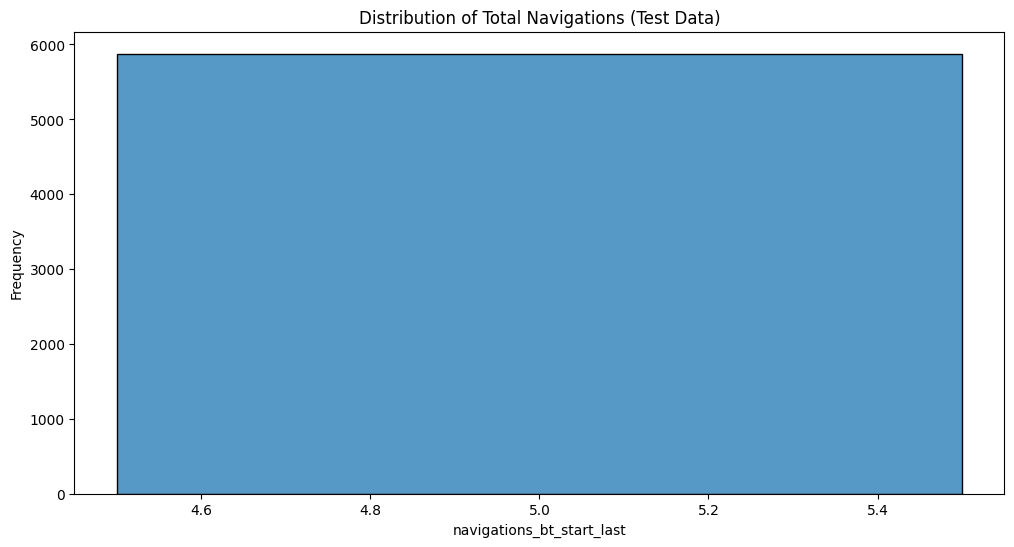

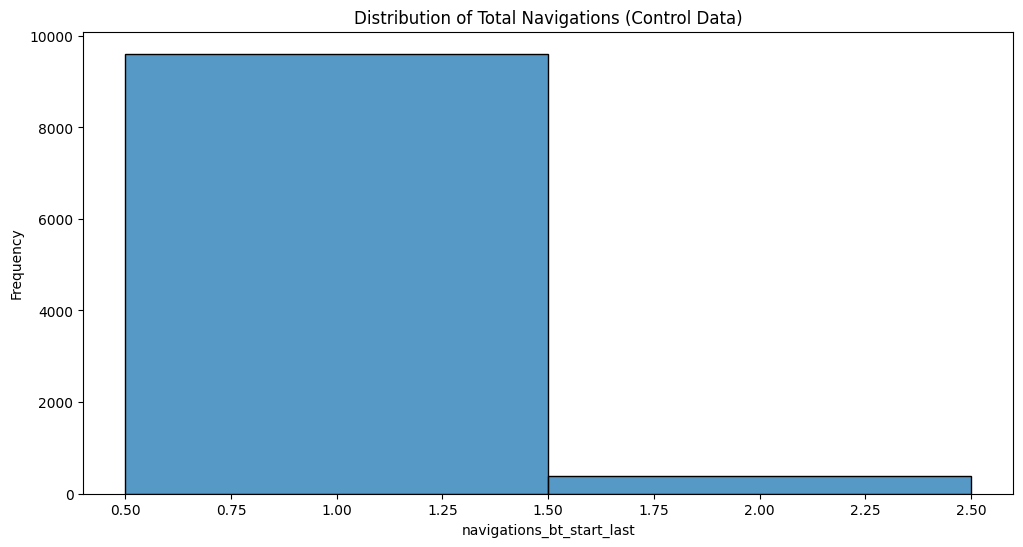

In [67]:
plot_distribution(df_test_final, 'navigations_bt_start_last', 'Distribution of Total Navigations (Test Data)')
plot_distribution(df_control_final, 'navigations_bt_start_last', 'Distribution of Total Navigations (Control Data)')

In [68]:
import plotly.graph_objects as go
filtered_df = df_control_final[df_control_final['navigations_bt_start_last'] <= 30]

# Calculate the frequency of 'navigations_bt_start_last' for 'completion' values 0 and 1
freq_completion_0 = filtered_df[filtered_df['completion'] == 0]['navigations_bt_start_last'].value_counts().sort_index()
freq_completion_1 = filtered_df[filtered_df['completion'] == 1]['navigations_bt_start_last'].value_counts().sort_index()

# Create a line graph
fig = go.Figure()

# Line for completion = 0
fig.add_trace(go.Scatter(
    x=freq_completion_0.index,
    y=freq_completion_0.values,
    mode='lines+markers',
    name='Completion = 0',
    line=dict(color='blue')
))

# Line for completion = 1
fig.add_trace(go.Scatter(
    x=freq_completion_1.index,
    y=freq_completion_1.values,
    mode='lines+markers',
    name='Completion = 1',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Frequency of Total Navigations for Completion = 0 and 1',
    xaxis_title='navigations_bt_start_last',
    yaxis_title='Frequency',
    legend_title_text='Completion'
)

# Show the plot


In [69]:
filtered_df_control = df_control_final[df_control_final['navigations_bt_start_last'] <= 30]

# Calculate the frequency of 'navigations_bt_start_last' for 'completion' values 0 and 1
freq_completion_0 = filtered_df_control[filtered_df_control['completion'] == 0]['navigations_bt_start_last'].value_counts().sort_index()
freq_completion_1 = filtered_df_control[filtered_df_control['completion'] == 1]['navigations_bt_start_last'].value_counts().sort_index()

# Create a line graph
fig = go.Figure()

# Line for completion = 0
fig.add_trace(go.Scatter(
    x=freq_completion_0.index,
    y=freq_completion_0.values,
    mode='lines+markers',
    name='Completion = 0',
    line=dict(color='blue')
))

# Line for completion = 1
fig.add_trace(go.Scatter(
    x=freq_completion_1.index,
    y=freq_completion_1.values,
    mode='lines+markers',
    name='Completion = 1',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Frequency of Total Navigations for Completion = 0 and 1',
    xaxis_title='navigations_bt_start_last',
    yaxis_title='Frequency',
    legend_title_text='Completion'
)

# Show the plot


## Visualization of different parameters

In [70]:

# Create a scatter plot with lines for error rate vs. completion rate
fig = go.Figure()

# Line+scatter for test data error rate
fig.add_trace(go.Scatter(
    x=error_rate_test.index,
    y=error_rate_test.values,
    mode='lines+markers',
    name='Test Data Error Rate',
    line=dict(shape='linear', color='red')
))

# Line+scatter for test data completion rate
fig.add_trace(go.Scatter(
    x=completion_rate_test.index,
    y=completion_rate_test.values,
    mode='lines+markers',
    name='Test Data Completion Rate',
    line=dict(shape='linear', color='blue')
))

# Line+scatter for control data error rate
fig.add_trace(go.Scatter(
    x=error_rate_control.index,
    y=error_rate_control.values,
    mode='lines+markers',
    name='Control Data Error Rate',
    line=dict(shape='linear', color='orange')
))

# Line+scatter for control data completion rate
fig.add_trace(go.Scatter(
    x=completion_rate_control.index,
    y=completion_rate_control.values,
    mode='lines+markers',
    name='Control Data Completion Rate',
    line=dict(shape='linear', color='green')
))

# Update layout
fig.update_layout(
    title='Completion Rate vs. Error Rate (Test and Control Data)',
    xaxis_title='Date',
    yaxis_title='Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Rate Type'
)

AttributeError: 'float' object has no attribute 'index'

In [ ]:
norm_freq_melted.sample(5)

,variation,Navigations,Normalized Frequency
18,Control,10,0.017108
49,Test,25,0.000092
6,Control,4,0.012442
33,Test,17,0.001102
19,Test,10,0.015203


In [ ]:
filtered_df = df_final[(df_final['navigations_bt_start_last'] <= 30) & (df_final['completion'] == 1)]

# Calculate the frequency of 'navigations_bt_start_last' for each variation
freq = filtered_df.groupby('variation')['navigations_bt_start_last'].value_counts().unstack().fillna(0)

# Normalize the frequencies
norm_freq = freq.div(freq.sum(axis=1), axis=0)

# Reset index for plotting
norm_freq = norm_freq.reset_index()

# Melt DataFrame for easier plotting
norm_freq_melted = norm_freq.melt(id_vars='variation', var_name='Navigations', value_name='Normalized Frequency')
fig = go.Figure()

# Add traces for each variation
for variation in norm_freq_melted['variation'].unique():
    df_variation = norm_freq_melted[norm_freq_melted['variation'] == variation]
    fig.add_trace(go.Scatter(
        x=df_variation['Navigations'],
        y=df_variation['Normalized Frequency'],
        mode='lines+markers',
        name=variation
    ))

# Update layout
fig.update_layout(
    title='Total Navigations done bteween start and last page by ussrs who completed the process',
    xaxis_title='Navigations',
    yaxis_title='Normalized Frequency',
    legend_title='variation',
    template='plotly_white'
)

# Show plot
fig.show()

In [ ]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Filter data for the first month
start_date = df_test_final['date'].min()
end_date = start_date + pd.DateOffset(days=30)

filtered_test_df = df_test_final[(df_test_final['date'] >= start_date) & (df_test_final['date'] < end_date)]
filtered_control_df = df_control_final[(df_control_final['date'] >= start_date) & (df_control_final['date'] < end_date)]

# Calculate daily completion rate for test data
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (First Month)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)

# Show the plot


In [ ]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Calculate the start and end dates for the second month
start_date = df_test_final['date'].min()
end_first_month = start_date + pd.DateOffset(days=30)
start_second_month = end_first_month
end_second_month = start_second_month + pd.DateOffset(days=30)

# Filter data for the second month
filtered_test_df = df_test_final[(df_test_final['date'] >= start_second_month) & (df_test_final['date'] < end_second_month)]
filtered_control_df = df_control_final[(df_control_final['date'] >= start_second_month) & (df_control_final['date'] < end_second_month)]

# Calculate daily completion rate for test data
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (Second Month)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)


In [ ]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Calculate the start and end dates for the third month
start_date = df_test_final['date'].min()
end_first_month = start_date + pd.DateOffset(days=30)
start_second_month = end_first_month
end_second_month = start_second_month + pd.DateOffset(days=30)
start_third_month = end_second_month
end_third_month = start_third_month + pd.DateOffset(days=30)

# Filter data for the third month
filtered_test_df = df_test_final[(df_test_final['date'] >= start_third_month) & (df_test_final['date'] < end_third_month)]
filtered_control_df = df_control_final[(df_control_final['date'] >= start_third_month) & (df_control_final['date'] < end_third_month)]

# Calculate daily completion rate for test data
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (Third Month)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)

# Show the plot


In [ ]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Calculate the start and end dates for the three months
start_date = df_test_final['date'].min()
end_third_month = start_date + pd.DateOffset(days=90)

# Filter data for the three months
filtered_test_df = df_test_final[(df_test_final['date'] >= start_date) & (df_test_final['date'] < end_third_month)]
filtered_control_df = df_control_final[(df_control_final['date'] >= start_date) & (df_control_final['date'] < end_third_month)]

# Calculate daily completion rate for test data
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(shape='linear', color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(shape='linear', color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (Three Months)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)

# Show the plot


In [ ]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Filter data where total_navigations is 3
filtered_test_df = df_test_final[df_test_final['navigations_bt_start_last'] == 3]
filtered_control_df = df_control_final[df_control_final['navigations_bt_start_last'] == 3]

# Calculate daily completion rate for test data where total_navigations is 3
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data where total_navigations is 3
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(shape='linear', color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(shape='linear', color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (Total Navigations = 3)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)

# Show the plot

In [ ]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Filter data where total_navigations is 3
filtered_test_df = df_test_final[df_test_final['navigations_bt_start_last'] == 5]
filtered_control_df = df_control_final[df_control_final['navigations_bt_start_last'] == 5]

# Count occurrences of total_navigations = 3 by date for test data
counts_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date).size()

# Count occurrences of total_navigations = 3 by date for control data
counts_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date).size()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=counts_test.index,
    y=counts_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(shape='linear', color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=counts_control.index,
    y=counts_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(shape='linear', color='red')
))

# Update layout
fig.update_layout(
    title='Frequency of Total steps taken = 5 by Date',
    xaxis_title='Date',
    yaxis_title='Frequency of Total steps taken = 5',
    legend_title_text='Data Source'
)

# Show the plot


NameError: name 'fig' is not defined

In [ ]:
df_test['date_time'] = pd.to_datetime(df_test['date_time'])
df_control['date_time'] = pd.to_datetime(df_control['date_time'])

# Function to calculate error rate and completion rate
def calculate_rates(df):
    # Sort the dataframe by 'visit_id' and 'date_time'
    df = df.sort_values(by=['visit_id', 'date_time'])
    
    # Calculate the time difference between steps
    df['time_diff'] = df.groupby('visit_id')['date_time'].diff().dt.total_seconds()
    
    # Identify completions (where process step is 'confirm')
    df['completion'] = df['process_step'] == 'confirm'
    
    # Convert 'process_step' to a category type and then to codes for numerical comparison
    df['process_step_code'] = df['process_step'].astype('category').cat.codes
    
    # Identify errors (going back to the previous step in less than 5 seconds)
    df['error'] = (df['time_diff'] < 30) & (df['process_step_code'].diff() < 0)
    
    # Calculate the daily error rate
    error_rate = df.groupby(df['date_time'].dt.date)['error'].mean()
    
    # Calculate the daily completion rate
    completion_rate = df.groupby(df['date_time'].dt.date)['completion'].mean()
    
    return error_rate, completion_rate

# Calculate rates for test data
error_rate_test, completion_rate_test = calculate_rates(df_test)

# Calculate rates for control data
error_rate_control, completion_rate_control = calculate_rates(df_control)

# Create a scatter plot with lines for error rate vs. completion rate
fig = go.Figure()

# Line+scatter for test data error rate
fig.add_trace(go.Scatter(
    x=error_rate_test.index,
    y=error_rate_test.values,
    mode='lines+markers',
    name='Test Data Error Rate',
    line=dict(shape='linear', color='red')
))

# Line+scatter for test data completion rate
fig.add_trace(go.Scatter(
    x=completion_rate_test.index,
    y=completion_rate_test.values,
    mode='lines+markers',
    name='Test Data Completion Rate',
    line=dict(shape='linear', color='blue')
))

# Line+scatter for control data error rate
fig.add_trace(go.Scatter(
    x=error_rate_control.index,
    y=error_rate_control.values,
    mode='lines+markers',
    name='Control Data Error Rate',
    line=dict(shape='linear', color='orange')
))

# Line+scatter for control data completion rate
fig.add_trace(go.Scatter(
    x=completion_rate_control.index,
    y=completion_rate_control.values,
    mode='lines+markers',
    name='Control Data Completion Rate',
    line=dict(shape='linear', color='green')
))

# Update layout
fig.update_layout(
    title='Completion Rate vs. Error Rate (Test and Control Data)',
    xaxis_title='Date',
    yaxis_title='Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Rate Type'
)

# Show the plot

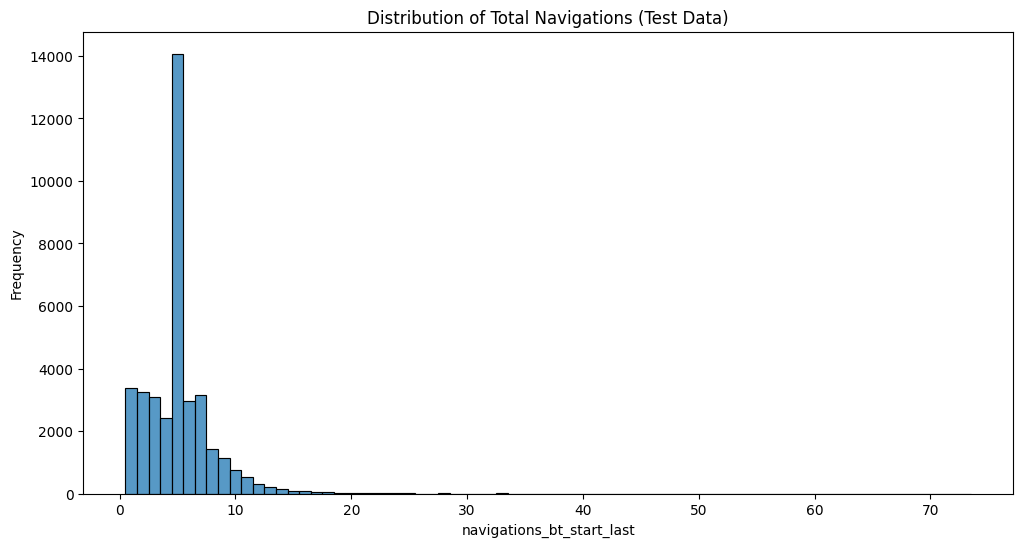

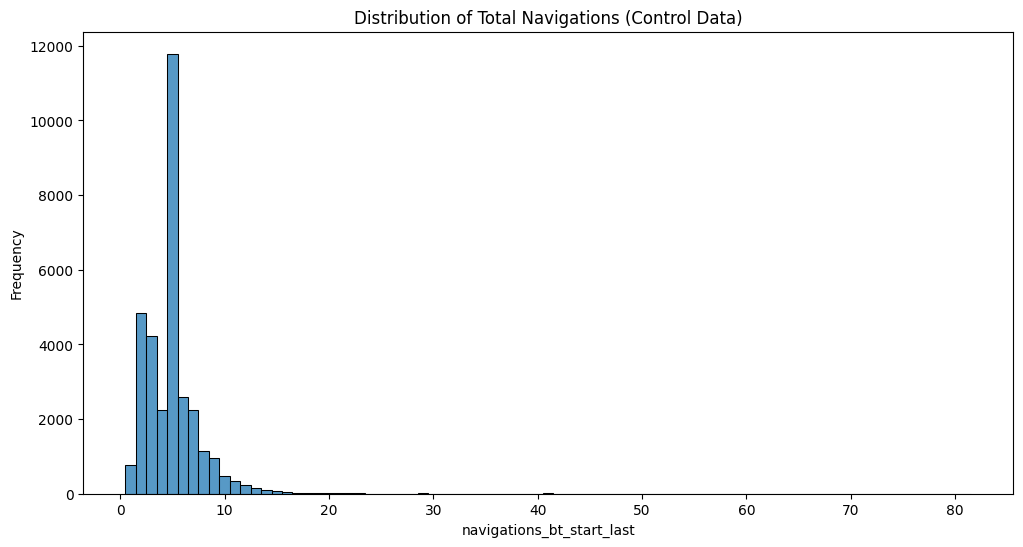

In [ ]:
def plot_distribution(df, variable, title):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[variable], kde=False, discrete=True, bins=range(df[variable].max() + 1))
    plt.title(title)
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution for total navigations in both test and control datasets
plot_distribution(df_test_final, 'navigations_bt_start_last', 'Distribution of Total Navigations (Test Data)')
plot_distribution(df_control_final, 'navigations_bt_start_last', 'Distribution of Total Navigations (Control Data)')

In [ ]:
from scipy.stats import shapiro

# Check normality for total_navigations
stat, p = shapiro(df_test_final['navigations_bt_start_last'])
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Shapiro-Wilk Test: Statistics=0.837, p=0.000
Sample does not look Gaussian (reject H0)


/home/danicoco/Escritorio/IronHack-DataAnalysis/5. week-five/project_2/.venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 37190.



In [ ]:
from scipy.stats import spearmanr, kendalltau

# Spearman correlation for test data
spearman_corr, spearman_p = spearmanr(df_test_final['navigations_bt_start_last'], df_test_final['completion'])
print(f'Spearman correlation: {spearman_corr}, p-value: {spearman_p}')

# Kendall's Tau correlation for test data
kendall_corr, kendall_p = kendalltau(df_test_final['navigations_bt_start_last'], df_test_final['completion'])
print(f'Kendall Tau correlation: {kendall_corr}, p-value: {kendall_p}')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_test_final['navigations_bt_start_last'], kde=False, discrete=True)
plt.title('Histogram of Total Navigations')
plt.xlabel('Total Navigations')
plt.ylabel('Frequency')
plt.show()

# Plot box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_test_final['navigations_bt_start_last'])
plt.title('Box Plot of Total Navigations')
plt.xlabel('Total Navigations')
plt.show()

In [ ]:
# Log Transformation
df_test_final['log_total_navigations'] = np.log1p(df_test_final['navigations_bt_start_last'])

# Check normality again after transformation
stat, p = shapiro(df_test_final['log_total_navigations'])
print('Shapiro-Wilk Test after Log Transformation: Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Transformed sample looks Gaussian (fail to reject H0)')
else:
    print('Transformed sample does not look Gaussian (reject H0)')

In [ ]:
import scipy.stats as stats
def plot_histogram(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Q-Q Plot
def plot_qqplot(data, column, title):
    plt.figure(figsize=(10, 6))
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(title)
    plt.show()

# Box Plot
def plot_boxplot(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(title)
    plt.xlabel(column)
    plt.show()

# Plot for 'navigations_bt_start_last'
plot_histogram(df_test_final, 'navigations_bt_start_last', 'Histogram of Total Navigations (Test Data)')
plot_qqplot(df_test_final, 'navigations_bt_start_last', 'Q-Q Plot of Total Navigations (Test Data)')
plot_boxplot(df_test_final, 'navigations_bt_start_last', 'Box Plot of Total Navigations (Test Data)')

In [ ]:
def shapiro_wilk_test(data, column):
    stat, p = stats.shapiro(data[column])
    print(f'Shapiro-Wilk Test for {column}: Statistics={stat}, p-value={p}')
    if p > 0.05:
        print(f'{column} looks Gaussian (fail to reject H0)')
    else:
        print(f'{column} does not look Gaussian (reject H0)')

# Kolmogorov-Smirnov Test
def kolmogorov_smirnov_test(data, column):
    stat, p = stats.kstest(data[column], 'norm', args=(data[column].mean(), data[column].std()))
    print(f'Kolmogorov-Smirnov Test for {column}: Statistics={stat}, p-value={p}')
    if p > 0.05:
        print(f'{column} looks Gaussian (fail to reject H0)')
    else:
        print(f'{column} does not look Gaussian (reject H0)')

# Anderson-Darling Test
def anderson_darling_test(data, column):
    result = stats.anderson(data[column])
    print(f'Anderson-Darling Test for {column}: Statistic={result.statistic}')
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            print(f'{sl}%: {column} looks Gaussian (fail to reject H0)')
        else:
            print(f'{sl}%: {column} does not look Gaussian (reject H0)')

# D'Agostino's K-squared Test
def dagostino_test(data, column):
    stat, p = stats.normaltest(data[column])
    print(f'D\'Agostino\'s K-squared Test for {column}: Statistics={stat}, p-value={p}')
    if p > 0.05:
        print(f'{column} looks Gaussian (fail to reject H0)')
    else:
        print(f'{column} does not look Gaussian (reject H0)')

# Apply tests for 'navigations_bt_start_last'
shapiro_wilk_test(df_test_final, 'navigations_bt_start_last')
kolmogorov_smirnov_test(df_test_final, 'navigations_bt_start_last')
anderson_darling_test(df_test_final, 'navigations_bt_start_last')
dagostino_test(df_test_final, 'navigations_bt_start_last')

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_test_final['navigations_bt_start_last'], kde=True)
plt.title('Original Data')
plt.subplot(1, 2, 2)
sns.histplot(df_test_final['log_total_navigations'], kde=True)
plt.title('Log Transformed Data')
plt.show()

# Step by step EDA for numerical columns

In [ ]:
sns.histplot(df_test_final['navigations_bt_start_last'], kde=True)
plt.show()
sns.boxplot(df_test_final['navigations_bt_start_last'])
plt.show()

In [ ]:
from scipy.stats import shapiro
shapiro_test = shapiro(df_test_final['navigations_bt_start_last'])
print(shapiro_test)

In [ ]:
from scipy import stats
z_scores = stats.zscore(df_test_final['navigations_bt_start_last'])
outliers = np.where(np.abs(z_scores) > 3)
print(outliers)

In [ ]:
skewness = df_test_final['navigations_bt_start_last'].skew()
kurtosis = df_test_final['navigations_bt_start_last'].kurt()
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

In [ ]:
df_test_final['log_total_navigations'] = np.log(df_test_final['navigations_bt_start_last'] + 1)
sns.histplot(df_test_final['log_total_navigations'], kde=True)
plt.show()

In [ ]:
df_test_final['sqrt_total_navigations'] = np.sqrt(df_test_final['navigations_bt_start_last'])

# Check distribution of square root-transformed total_navigations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_test_final['sqrt_total_navigations'], kde=True)
plt.title('Histogram of Square Root-Transformed Total Navigations')

plt.subplot(1, 2, 2)
stats.probplot(df_test_final['sqrt_total_navigations'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Square Root-Transformed Total Navigations')

plt.show()

# Perform Shapiro-Wilk test for normality on square root-transformed data
shapiro_test_sqrt = stats.shapiro(df_test_final['sqrt_total_navigations'])
print(f'Shapiro-Wilk Test on Square Root-Transformed Data: Statistic={shapiro_test_sqrt.statistic}, p-value={shapiro_test_sqrt.pvalue}')

In [ ]:
df_test_final['yeojohnson_total_navigations'], fitted_lambda = stats.yeojohnson(df_test_final['navigations_bt_start_last'])

# Check distribution of Yeo-Johnson transformed total_navigations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_test_final['yeojohnson_total_navigations'], kde=True)
plt.title('Histogram of Yeo-Johnson Transformed Total Navigations')

plt.subplot(1, 2, 2)
stats.probplot(df_test_final['yeojohnson_total_navigations'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Yeo-Johnson Transformed Total Navigations')

plt.show()

# Perform Shapiro-Wilk test for normality on Yeo-Johnson transformed data
shapiro_test_yeojohnson = stats.shapiro(df_test_final['yeojohnson_total_navigations'])
print(f'Shapiro-Wilk Test on Yeo-Johnson Transformed Data: Statistic={shapiro_test_yeojohnson.statistic}, p-value={shapiro_test_yeojohnson.pvalue}')

In [ ]:
def bootstrap_statistic(data, n_iterations=1000, stat_function=np.mean):
    bootstrapped_stats = np.empty(n_iterations)
    for i in range(n_iterations):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_stats[i] = stat_function(sample)
    return bootstrapped_stats

# Bootstrapping the mean of total navigations
bootstrapped_means = bootstrap_statistic(df_test_final['navigations_bt_start_last'].dropna())

# Calculate confidence intervals
confidence_interval = np.percentile(bootstrapped_means, [2.5, 97.5])
print("95% Confidence Interval for the mean of total navigations:", confidence_interval)


import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df_test_final['navigations_bt_start_last'], ax=axes[0], kde=True)
axes[0].set_title('Original Data')

sns.histplot(np.log1p(df_test_final['navigations_bt_start_last']), ax=axes[1], kde=True)
axes[1].set_title('Log-Transformed Data')

plt.tight_layout()
plt.show()

In [ ]:
def bootstrap_statistic(data, n_iterations=1000, stat_function=np.mean):
    bootstrapped_stats = np.empty(n_iterations)
    for i in range(n_iterations):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_stats[i] = stat_function(sample)
    return bootstrapped_stats

# Calculate bootstrapped means
bootstrapped_means = bootstrap_statistic(df_test_final['navigations_bt_start_last'].dropna())

# Calculate 95% confidence intervals
confidence_interval = np.percentile(bootstrapped_means, [2.5, 97.5])
print("95% Confidence Interval for the mean of total navigations:", confidence_interval)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of bootstrapped means
sns.histplot(bootstrapped_means, kde=True)
plt.axvline(confidence_interval[0], color='red', linestyle='--', label=f'Lower 95% CI: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='red', linestyle='--', label=f'Upper 95% CI: {confidence_interval[1]:.2f}')
plt.title('Bootstrapped Means of Total Navigations')
plt.xlabel('Mean of Total Navigations')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
stat, p = shapiro(df_test_final['navigations_bt_start_last'].dropna())
print(f'Statistic: {stat}, P-value: {p}')

import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df_test_final['navigations_bt_start_last'], dist="norm", plot=plt)
plt.show()

In [ ]:
def bootstrap_mean(data, n_iterations=1000):
    boot_means = np.empty(n_iterations)
    for i in range(n_iterations):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means[i] = np.mean(sample)
    return boot_means

# Bootstrapped means for total_navigations
boot_means = bootstrap_mean(df_test_final['navigations_bt_start_last'].dropna())

# Calculate 95% confidence intervals
ci_low, ci_high = np.percentile(boot_means, [2.5, 97.5])
print(f'95% Confidence Interval for the mean of total navigations: [{ci_low}, {ci_high}]')

# Plotting the bootstrapped means
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(boot_means, kde=True)
plt.axvline(ci_low, color='red', linestyle='--', label=f'Lower 95% CI: {ci_low:.2f}')
plt.axvline(ci_high, color='red', linestyle='--', label=f'Upper 95% CI: {ci_high:.2f}')
plt.title('Bootstrapped Means of Total Navigations')
plt.xlabel('Mean of Total Navigations')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
z_scores = stats.zscore(df_test_final['total_time_visit'])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3)  # Remove entries with z-score > 3
df_no_outliers = df_test_final[filtered_entries]

# Creating the violin plot without outliers
plt.figure(figsize=(10, 6))
sns.violinplot(x='completion', y='total_time_visit', data=df_no_outliers)
plt.title('Violin Plot of Total Navigations by Category (Outliers Removed)')
plt.show()

In [ ]:
df_no_outliers['log_total_navigations'] = np.log1p(df_no_outliers['total_time_visit'])

# Creating the violin plot with transformed data
plt.figure(figsize=(10, 6))
sns.violinplot(x='completion', y='total_time_visit', data=df_no_outliers)
plt.title('Violin Plot of Log Transformed Total Navigations by Category')
plt.show()

In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(df_test_final['navigations_bt_start_last']))

# Define the threshold for identifying outliers
threshold = 3

# Get a boolean array indicating if each point is an outlier
outliers = z_scores > threshold

# Filter out the outliers
df_test_final_no_outliers = df_test_final[~outliers]

# Plotting the cleaned data
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_test_final_no_outliers['navigations_bt_start_last'], kde=True)
plt.title('Distribution of Total Navigations After Removing Outliers')
plt.xlabel('navigations_bt_start_last')
plt.ylabel('Frequency')
plt.show()

In [ ]:
Q1 = df_test_final['navigations_bt_start_last'].quantile(0.25)
Q3 = df_test_final['navigations_bt_start_last'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_test_final_no_outliers = df_test_final[(df_test_final['navigations_bt_start_last'] >= lower_bound) & 
                                          (df_test_final['navigations_bt_start_last'] <= upper_bound)]

# Plotting the cleaned data
sns.histplot(df_test_final_no_outliers['navigations_bt_start_last'], kde=True)
plt.title('Distribution of Total Navigations After Removing Outliers')
plt.xlabel('Total Navigations')
plt.ylabel('Frequency')
plt.show()

### Experiment Design

In [ ]:


# Experiment Design Evaluation with Visualizations
def experiment_evaluation_with_visualizations(df_control, df_test):
    control_size = df_control['visit_visitor_id'].nunique()
    test_size = df_test['visit_visitor_id'].nunique()

    print("Control Group Size:", control_size)
    print("Test Group Size:", test_size)

    # Plot Group Sizes
    plt.figure(figsize=(10, 5))
    plt.bar(['Control', 'Test'], [control_size, test_size], color=['blue', 'orange'])
    plt.title('Group Sizes')
    plt.ylabel('Number of Unique Visitors')
    plt.show()

    # Gender Distribution
    gender_dist_control = df_control['gendr'].value_counts(normalize=True)
    gender_dist_test = df_test['gendr'].value_counts(normalize=True)

    print("Gender Distribution Control:\n", gender_dist_control)
    print("Gender Distribution Test:\n", gender_dist_test)

    # Plot Gender Distribution
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    axs[0].pie(gender_dist_control, labels=gender_dist_control.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
    axs[0].set_title('Gender Distribution - Control Group')

    axs[1].pie(gender_dist_test, labels=gender_dist_test.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
    axs[1].set_title('Gender Distribution - Test Group')

    plt.show()

experiment_evaluation_with_visualizations(df_control_final, df_test_final)


In [ ]:
# Additional Data Needs
print("Additional data that could enhance the analysis:")
print("- Detailed logs of user interactions (e.g., clicks, hovers)")
print("- Feedback or survey data on user satisfaction")
print("- Data on external factors that could influence user behavior (e.g., marketing campaigns)")


In [ ]:
norm_freq_melted.sample(5)

NameError: name 'norm_freq_melted' is not defined

In [ ]:
filtered_df = df_final[(df_final['navigations_bt_start_last'] <= 30) & (df_final['completion'] == 1)]

# Calculate the frequency of 'navigations_bt_start_last' for each variation
freq = filtered_df.groupby('variation')['navigations_bt_start_last'].value_counts().unstack().fillna(0)

# Normalize the frequencies
norm_freq = freq.div(freq.sum(axis=1), axis=0)

# Reset index for plotting
norm_freq = norm_freq.reset_index()

# Melt DataFrame for easier plotting
norm_freq_melted = norm_freq.melt(id_vars='variation', var_name='Navigations', value_name='Normalized Frequency')
fig = go.Figure()

# Add traces for each variation
for variation in norm_freq_melted['variation'].unique():
    df_variation = norm_freq_melted[norm_freq_melted['variation'] == variation]
    fig.add_trace(go.Scatter(
        x=df_variation['Navigations'],
        y=df_variation['Normalized Frequency'],
        mode='lines+markers',
        name=variation
    ))

# Update layout
fig.update_layout(
    title='Total Navigations done bteween start and last page by ussrs who completed the process',
    xaxis_title='Navigations',
    yaxis_title='Normalized Frequency',
    legend_title='variation',
    template='plotly_white'
)

# Show plot
fig.show()

In [ ]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Filter data for the first month
start_date = df_test_final['date'].min()
end_date = start_date + pd.DateOffset(days=30)

filtered_test_df = df_test_final[(df_test_final['date'] >= start_date) & (df_test_final['date'] < end_date)]
filtered_control_df = df_control_final[(df_control_final['date'] >= start_date) & (df_control_final['date'] < end_date)]

# Calculate daily completion rate for test data
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (First Month)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)

# Show the plot


In [ ]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Calculate the start and end dates for the second month
start_date = df_test_final['date'].min()
end_first_month = start_date + pd.DateOffset(days=30)
start_second_month = end_first_month
end_second_month = start_second_month + pd.DateOffset(days=30)

# Filter data for the second month
filtered_test_df = df_test_final[(df_test_final['date'] >= start_second_month) & (df_test_final['date'] < end_second_month)]
filtered_control_df = df_control_final[(df_control_final['date'] >= start_second_month) & (df_control_final['date'] < end_second_month)]

# Calculate daily completion rate for test data
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (Second Month)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)


In [ ]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Calculate the start and end dates for the third month
start_date = df_test_final['date'].min()
end_first_month = start_date + pd.DateOffset(days=30)
start_second_month = end_first_month
end_second_month = start_second_month + pd.DateOffset(days=30)
start_third_month = end_second_month
end_third_month = start_third_month + pd.DateOffset(days=30)

# Filter data for the third month
filtered_test_df = df_test_final[(df_test_final['date'] >= start_third_month) & (df_test_final['date'] < end_third_month)]
filtered_control_df = df_control_final[(df_control_final['date'] >= start_third_month) & (df_control_final['date'] < end_third_month)]

# Calculate daily completion rate for test data
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (Third Month)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)

# Show the plot


In [ ]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Calculate the start and end dates for the three months
start_date = df_test_final['date'].min()
end_third_month = start_date + pd.DateOffset(days=90)

# Filter data for the three months
filtered_test_df = df_test_final[(df_test_final['date'] >= start_date) & (df_test_final['date'] < end_third_month)]
filtered_control_df = df_control_final[(df_control_final['date'] >= start_date) & (df_control_final['date'] < end_third_month)]

# Calculate daily completion rate for test data
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(shape='linear', color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(shape='linear', color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (Three Months)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)

# Show the plot


In [ ]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Filter data where total_navigations is 3
filtered_test_df = df_test_final[df_test_final['navigations_bt_start_last'] == 3]
filtered_control_df = df_control_final[df_control_final['navigations_bt_start_last'] == 3]

# Calculate daily completion rate for test data where total_navigations is 3
daily_completion_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date)['completion'].mean()

# Calculate daily completion rate for control data where total_navigations is 3
daily_completion_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date)['completion'].mean()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=daily_completion_test.index,
    y=daily_completion_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(shape='linear', color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=daily_completion_control.index,
    y=daily_completion_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(shape='linear', color='red')
))

# Update layout
fig.update_layout(
    title='Daily Completion Rate for Test and Control Data (Total Navigations = 3)',
    xaxis_title='Date',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source'
)

# Show the plot

In [ ]:
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Filter data where total_navigations is 3
filtered_test_df = df_test_final[df_test_final['total_steps'] == 5]
filtered_control_df = df_control_final[df_control_final['total_steps'] == 5]

# Count occurrences of total_navigations = 3 by date for test data
counts_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date).size()

# Count occurrences of total_navigations = 3 by date for control data
counts_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date).size()

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=counts_test.index,
    y=counts_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(shape='linear', color='blue')
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=counts_control.index,
    y=counts_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(shape='linear', color='red')
))

# Update layout
fig.update_layout(
    title='Frequency of Total steps taken = 5 by Date',
    xaxis_title='Date',
    yaxis_title='Frequency of Total steps taken = 5',
    legend_title_text='Data Source'
)

# Show the plot


In [ ]:
df_test['date_time'] = pd.to_datetime(df_test['date_time'])
df_control['date_time'] = pd.to_datetime(df_control['date_time'])

# Function to calculate error rate and completion rate
def calculate_rates(df):
    # Sort the dataframe by 'visit_id' and 'date_time'
    df = df.sort_values(by=['visit_id', 'date_time'])
    
    # Calculate the time difference between steps
    df['time_diff'] = df.groupby('visit_id')['date_time'].diff().dt.total_seconds()
    
    # Identify completions (where process step is 'confirm')
    df['completion'] = df['process_step'] == 'confirm'
    
    # Convert 'process_step' to a category type and then to codes for numerical comparison
    df['process_step_code'] = df['process_step'].astype('category').cat.codes
    
    # Identify errors (going back to the previous step in less than 5 seconds)
    df['error'] = (df['time_diff'] < 30) & (df['process_step_code'].diff() < 0)
    
    # Calculate the daily error rate
    error_rate = df.groupby(df['date_time'].dt.date)['error'].mean()
    
    # Calculate the daily completion rate
    completion_rate = df.groupby(df['date_time'].dt.date)['completion'].mean()
    
    return error_rate, completion_rate

# Calculate rates for test data
error_rate_test, completion_rate_test = calculate_rates(df_test)

# Calculate rates for control data
error_rate_control, completion_rate_control = calculate_rates(df_control)

# Create a scatter plot with lines for error rate vs. completion rate
fig = go.Figure()

# Line+scatter for test data error rate
fig.add_trace(go.Scatter(
    x=error_rate_test.index,
    y=error_rate_test.values,
    mode='lines+markers',
    name='Test Data Error Rate',
    line=dict(shape='linear', color='red')
))

# Line+scatter for test data completion rate
fig.add_trace(go.Scatter(
    x=completion_rate_test.index,
    y=completion_rate_test.values,
    mode='lines+markers',
    name='Test Data Completion Rate',
    line=dict(shape='linear', color='blue')
))

# Line+scatter for control data error rate
fig.add_trace(go.Scatter(
    x=error_rate_control.index,
    y=error_rate_control.values,
    mode='lines+markers',
    name='Control Data Error Rate',
    line=dict(shape='linear', color='orange')
))

# Line+scatter for control data completion rate
fig.add_trace(go.Scatter(
    x=completion_rate_control.index,
    y=completion_rate_control.values,
    mode='lines+markers',
    name='Control Data Completion Rate',
    line=dict(shape='linear', color='green')
))

# Update layout
fig.update_layout(
    title='Completion Rate vs. Error Rate (Test and Control Data)',
    xaxis_title='Date',
    yaxis_title='Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Rate Type'
)

# Show the plot

In [ ]:
def plot_distribution(df, variable, title):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[variable], kde=False, discrete=True, bins=range(df[variable].max() + 1))
    plt.title(title)
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution for total navigations in both test and control datasets
plot_distribution(df_test_final, 'navigations_bt_start_last', 'Distribution of Total Navigations (Test Data)')
plot_distribution(df_control_final, 'navigations_bt_start_last', 'Distribution of Total Navigations (Control Data)')

In [ ]:
from scipy.stats import shapiro

# Check normality for total_navigations
stat, p = shapiro(df_test_final['navigations_bt_start_last'])
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

In [ ]:
from scipy.stats import spearmanr, kendalltau

# Spearman correlation for test data
spearman_corr, spearman_p = spearmanr(df_test_final['navigations_bt_start_last'], df_test_final['completion'])
print(f'Spearman correlation: {spearman_corr}, p-value: {spearman_p}')

# Kendall's Tau correlation for test data
kendall_corr, kendall_p = kendalltau(df_test_final['navigations_bt_start_last'], df_test_final['completion'])
print(f'Kendall Tau correlation: {kendall_corr}, p-value: {kendall_p}')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_test_final['navigations_bt_start_last'], kde=False, discrete=True)
plt.title('Histogram of Total Navigations')
plt.xlabel('Total Navigations')
plt.ylabel('Frequency')
plt.show()

# Plot box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_test_final['navigations_bt_start_last'])
plt.title('Box Plot of Total Navigations')
plt.xlabel('Total Navigations')
plt.show()

In [ ]:
# Log Transformation
df_test_final['log_total_navigations'] = np.log1p(df_test_final['navigations_bt_start_last'])

# Check normality again after transformation
stat, p = shapiro(df_test_final['log_total_navigations'])
print('Shapiro-Wilk Test after Log Transformation: Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Transformed sample looks Gaussian (fail to reject H0)')
else:
    print('Transformed sample does not look Gaussian (reject H0)')

In [ ]:
import scipy.stats as stats
def plot_histogram(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Q-Q Plot
def plot_qqplot(data, column, title):
    plt.figure(figsize=(10, 6))
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(title)
    plt.show()

# Box Plot
def plot_boxplot(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(title)
    plt.xlabel(column)
    plt.show()

# Plot for 'navigations_bt_start_last'
plot_histogram(df_test_final, 'navigations_bt_start_last', 'Histogram of Total Navigations (Test Data)')
plot_qqplot(df_test_final, 'navigations_bt_start_last', 'Q-Q Plot of Total Navigations (Test Data)')
plot_boxplot(df_test_final, 'navigations_bt_start_last', 'Box Plot of Total Navigations (Test Data)')

In [ ]:
def shapiro_wilk_test(data, column):
    stat, p = stats.shapiro(data[column])
    print(f'Shapiro-Wilk Test for {column}: Statistics={stat}, p-value={p}')
    if p > 0.05:
        print(f'{column} looks Gaussian (fail to reject H0)')
    else:
        print(f'{column} does not look Gaussian (reject H0)')

# Kolmogorov-Smirnov Test
def kolmogorov_smirnov_test(data, column):
    stat, p = stats.kstest(data[column], 'norm', args=(data[column].mean(), data[column].std()))
    print(f'Kolmogorov-Smirnov Test for {column}: Statistics={stat}, p-value={p}')
    if p > 0.05:
        print(f'{column} looks Gaussian (fail to reject H0)')
    else:
        print(f'{column} does not look Gaussian (reject H0)')

# Anderson-Darling Test
def anderson_darling_test(data, column):
    result = stats.anderson(data[column])
    print(f'Anderson-Darling Test for {column}: Statistic={result.statistic}')
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            print(f'{sl}%: {column} looks Gaussian (fail to reject H0)')
        else:
            print(f'{sl}%: {column} does not look Gaussian (reject H0)')

# D'Agostino's K-squared Test
def dagostino_test(data, column):
    stat, p = stats.normaltest(data[column])
    print(f'D\'Agostino\'s K-squared Test for {column}: Statistics={stat}, p-value={p}')
    if p > 0.05:
        print(f'{column} looks Gaussian (fail to reject H0)')
    else:
        print(f'{column} does not look Gaussian (reject H0)')

# Apply tests for 'navigations_bt_start_last'
shapiro_wilk_test(df_test_final, 'navigations_bt_start_last')
kolmogorov_smirnov_test(df_test_final, 'navigations_bt_start_last')
anderson_darling_test(df_test_final, 'navigations_bt_start_last')
dagostino_test(df_test_final, 'navigations_bt_start_last')

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_test_final['navigations_bt_start_last'], kde=True)
plt.title('Original Data')
plt.subplot(1, 2, 2)
sns.histplot(df_test_final['log_total_navigations'], kde=True)
plt.title('Log Transformed Data')
plt.show()

In [ ]:
df_test['date_time'] = pd.to_datetime(df_test['date_time'])
df_control['date_time'] = pd.to_datetime(df_control['date_time'])

# Function to calculate error rate and completion rate
def calculate_rates(df):
    # Sort the dataframe by 'visit_id' and 'date_time'
    df = df.sort_values(by=['visit_id', 'date_time'])
    
    # Calculate the time difference between steps
    df['time_diff'] = df.groupby('visit_id')['date_time'].diff().dt.total_seconds()
    
    # Identify completions (where process step is 'confirm')
    df['completion'] = df['process_step'] == 'confirm'
    
    # Convert 'process_step' to a category type and then to codes for numerical comparison
    df['process_step_code'] = df['process_step'].astype('category').cat.codes
    
    # Identify errors (going back to the previous step in less than 5 seconds)
    df['error'] = (df['time_diff'] < 30) & (df['process_step_code'].diff() < 0)
    
    # Calculate the daily error rate
    error_rate = df.groupby(df['date_time'].dt.date)['error'].mean()
    
    # Calculate the daily completion rate
    completion_rate = df.groupby(df['date_time'].dt.date)['completion'].mean()
    
    return error_rate, completion_rate

# Calculate rates for test data
error_rate_test, completion_rate_test = calculate_rates(df_test)

# Calculate rates for control data
error_rate_control, completion_rate_control = calculate_rates(df_control)

# Create a scatter plot with lines for error rate vs. completion rate
fig = go.Figure()

# Line+scatter for test data error rate
fig.add_trace(go.Scatter(
    x=error_rate_test.index,
    y=error_rate_test.values,
    mode='lines+markers',
    name='Test Data Error Rate',
    line=dict(shape='linear', color='red')
))

# Line+scatter for test data completion rate
fig.add_trace(go.Scatter(
    x=completion_rate_test.index,
    y=completion_rate_test.values,
    mode='lines+markers',
    name='Test Data Completion Rate',
    line=dict(shape='linear', color='blue')
))

# Line+scatter for control data error rate
fig.add_trace(go.Scatter(
    x=error_rate_control.index,
    y=error_rate_control.values,
    mode='lines+markers',
    name='Control Data Error Rate',
    line=dict(shape='linear', color='orange')
))

# Line+scatter for control data completion rate
fig.add_trace(go.Scatter(
    x=completion_rate_control.index,
    y=completion_rate_control.values,
    mode='lines+markers',
    name='Control Data Completion Rate',
    line=dict(shape='linear', color='green')
))

# Update layout
fig.update_layout(
    title='Completion Rate vs. Error Rate (Test and Control Data)',
    xaxis_title='Date',
    yaxis_title='Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Rate Type'
)

# Show the plot

In [ ]:
def plot_distribution(df, variable, title):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[variable], kde=False, discrete=True, bins=range(df[variable].max() + 1))
    plt.title(title)
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution for total navigations in both test and control datasets
plot_distribution(df_test_final, 'navigations_bt_start_last', 'Distribution of Total Navigations (Test Data)')
plot_distribution(df_control_final, 'navigations_bt_start_last', 'Distribution of Total Navigations (Control Data)')

In [ ]:
from scipy.stats import shapiro

# Check normality for total_navigations
stat, p = shapiro(df_test_final['navigations_bt_start_last'])
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

In [ ]:
from scipy.stats import spearmanr, kendalltau

# Spearman correlation for test data
spearman_corr, spearman_p = spearmanr(df_test_final['navigations_bt_start_last'], df_test_final['completion'])
print(f'Spearman correlation: {spearman_corr}, p-value: {spearman_p}')

# Kendall's Tau correlation for test data
kendall_corr, kendall_p = kendalltau(df_test_final['navigations_bt_start_last'], df_test_final['completion'])
print(f'Kendall Tau correlation: {kendall_corr}, p-value: {kendall_p}')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_test_final['navigations_bt_start_last'], kde=False, discrete=True)
plt.title('Histogram of Total Navigations')
plt.xlabel('Total Navigations')
plt.ylabel('Frequency')
plt.show()

# Plot box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_test_final['navigations_bt_start_last'])
plt.title('Box Plot of Total Navigations')
plt.xlabel('Total Navigations')
plt.show()

In [ ]:
# Log Transformation
df_test_final['log_total_navigations'] = np.log1p(df_test_final['navigations_bt_start_last'])

# Check normality again after transformation
stat, p = shapiro(df_test_final['log_total_navigations'])
print('Shapiro-Wilk Test after Log Transformation: Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Transformed sample looks Gaussian (fail to reject H0)')
else:
    print('Transformed sample does not look Gaussian (reject H0)')

In [ ]:
import scipy.stats as stats
def plot_histogram(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Q-Q Plot
def plot_qqplot(data, column, title):
    plt.figure(figsize=(10, 6))
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(title)
    plt.show()

# Box Plot
def plot_boxplot(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(title)
    plt.xlabel(column)
    plt.show()

# Plot for 'navigations_bt_start_last'
plot_histogram(df_test_final, 'navigations_bt_start_last', 'Histogram of Total Navigations (Test Data)')
plot_qqplot(df_test_final, 'navigations_bt_start_last', 'Q-Q Plot of Total Navigations (Test Data)')
plot_boxplot(df_test_final, 'navigations_bt_start_last', 'Box Plot of Total Navigations (Test Data)')

In [ ]:
def shapiro_wilk_test(data, column):
    stat, p = stats.shapiro(data[column])
    print(f'Shapiro-Wilk Test for {column}: Statistics={stat}, p-value={p}')
    if p > 0.05:
        print(f'{column} looks Gaussian (fail to reject H0)')
    else:
        print(f'{column} does not look Gaussian (reject H0)')

# Kolmogorov-Smirnov Test
def kolmogorov_smirnov_test(data, column):
    stat, p = stats.kstest(data[column], 'norm', args=(data[column].mean(), data[column].std()))
    print(f'Kolmogorov-Smirnov Test for {column}: Statistics={stat}, p-value={p}')
    if p > 0.05:
        print(f'{column} looks Gaussian (fail to reject H0)')
    else:
        print(f'{column} does not look Gaussian (reject H0)')

# Anderson-Darling Test
def anderson_darling_test(data, column):
    result = stats.anderson(data[column])
    print(f'Anderson-Darling Test for {column}: Statistic={result.statistic}')
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            print(f'{sl}%: {column} looks Gaussian (fail to reject H0)')
        else:
            print(f'{sl}%: {column} does not look Gaussian (reject H0)')

# D'Agostino's K-squared Test
def dagostino_test(data, column):
    stat, p = stats.normaltest(data[column])
    print(f'D\'Agostino\'s K-squared Test for {column}: Statistics={stat}, p-value={p}')
    if p > 0.05:
        print(f'{column} looks Gaussian (fail to reject H0)')
    else:
        print(f'{column} does not look Gaussian (reject H0)')

# Apply tests for 'navigations_bt_start_last'
shapiro_wilk_test(df_test_final, 'navigations_bt_start_last')
kolmogorov_smirnov_test(df_test_final, 'navigations_bt_start_last')
anderson_darling_test(df_test_final, 'navigations_bt_start_last')
dagostino_test(df_test_final, 'navigations_bt_start_last')

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_test_final['navigations_bt_start_last'], kde=True)
plt.title('Original Data')
plt.subplot(1, 2, 2)
sns.histplot(df_test_final['log_total_navigations'], kde=True)
plt.title('Log Transformed Data')
plt.show()

# Calculate Correlation Coefficients

# Multivariate Analysis

In [ ]:
# Tenure + Gender + Completion Control
tenure_gender_completion_control = df_final[df_final['variation'] == 'Control'].groupby(['clnt_tenure_yr', 'gendr', 'completion']).size().reset_index(name='count')
tenure_gender_completion_control.to_csv('../Tables/tenure_gender_completion_control.csv', index=False)
tenure_gender_completion_control


In [ ]:
sns.barplot(data=tenure_age_completion_control, x=pd.cut(tenure_age_completion_control['clnt_tenure_yr'], bins=10), y='count', hue='completion')
plt.title('Tenure + Age + Completion Control')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Tenure + Gender + Completion Test
tenure_gender_completion_test = df_final[df_final['variation'] == 'Test'].groupby(['clnt_tenure_yr', 'gendr', 'completion']).size().reset_index(name='count')
tenure_gender_completion_test.to_csv('../Tables/tenure_gender_completion_test.csv', index=False)
tenure_gender_completion_test


In [ ]:
sns.barplot(data=tenure_age_completion_control, x=pd.cut(tenure_age_completion_control['clnt_tenure_yr'], bins=10), y='count', hue='completion')
plt.title('Tenure + Age + Completion Control')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Balance + Tenure + Completion Control
balance_tenure_completion_control = df_final[df_final['variation'] == 'Control'].groupby(['clnt_tenure_yr', 'bal', 'completion']).size().reset_index(name='count')
balance_tenure_completion_control.to_csv('../Tables/balance_tenure_completion_control.csv', index=False)
balance_tenure_completion_control

In [ ]:
sns.barplot(data=tenure_age_completion_control, x=pd.cut(tenure_age_completion_control['clnt_tenure_yr'], bins=10), y='count', hue='completion')
plt.title('Tenure + Age + Completion Control')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Balance + Tenure + Completion Test
balance_tenure_completion_test = df_final[df_final['variation'] == 'Test'].groupby(['clnt_tenure_yr', 'bal', 'completion']).size().reset_index(name='count')
balance_tenure_completion_test.to_csv('../Tables/balance_tenure_completion_test.csv', index=False)
balance_tenure_completion_test

In [ ]:
sns.barplot(data=balance_tenure_completion_control, x=pd.cut(balance_tenure_completion_control['clnt_tenure_yr'], bins=10), y='count', hue='completion')
plt.title('Balance + Tenure + Completion Control')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
df_final.columns

In [ ]:
# Total Navigation + Last Step Control
total_nav_last_step_control = df_final[df_final['variation'] == 'Control'].groupby(['navigations_bt_start_last', 'last_step']).size().reset_index(name='count')
total_nav_last_step_control.to_csv('../Tables/total_nav_last_step_control.csv', index=False)
total_nav_last_step_control

In [ ]:
sns.barplot(data=balance_tenure_completion_control, x=pd.cut(balance_tenure_completion_control['clnt_tenure_yr'], bins=10), y='count', hue='completion')
plt.title('Balance + Tenure + Completion Control')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Total Navigation + Last Step Test
total_nav_last_step_test = df_final[df_final['variation'] == 'Test'].groupby(['navigations_bt_start_last', 'last_step']).size().reset_index(name='count')
total_nav_last_step_test.to_csv('../Tables/total_nav_last_step_test.csv', index=False)
total_nav_last_step_test

In [ ]:
sns.barplot(data=balance_tenure_completion_control, x=pd.cut(balance_tenure_completion_control['clnt_tenure_yr'], bins=10), y='count', hue='completion')
plt.title('Balance + Tenure + Completion Control')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Total Navigation and Completions Control
total_nav_completion_control = df_final[df_final['variation'] == 'Control'].groupby(['navigations_bt_start_last', 'completion']).size().reset_index(name='count')
total_nav_completion_control.to_csv('../Tables/total_nav_completion_control.csv', index=False)
total_nav_completion_control

In [ ]:
sns.barplot(data=balance_tenure_completion_control, x=pd.cut(balance_tenure_completion_control['clnt_tenure_yr'], bins=10), y='count', hue='completion')
plt.title('Balance + Tenure + Completion Control')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Total Navigation and Completions Test
total_nav_completion_test = df_final[df_final['variation'] == 'Test'].groupby(['navigations_bt_start_last', 'completion']).size().reset_index(name='count')
total_nav_completion_test.to_csv('../Tables/total_nav_completion_test.csv', index=False)
total_nav_completion_test

,navigations_bt_start_last,completion,count
0,1,1,3367
1,2,0,3068
2,2,1,193
3,3,0,3014
4,3,1,88
...,...,...,...
66,43,1,1
67,49,1,1
68,56,1,1
69,60,1,1


In [ ]:
sns.barplot(data=balance_tenure_completion_control, x=pd.cut(balance_tenure_completion_control['clnt_tenure_yr'], bins=10), y='count', hue='completion')
plt.title('Balance + Tenure + Completion Control')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

NameError: name 'balance_tenure_completion_control' is not defined

In [ ]:
# Step Where Clients Drop Control
steps_drop_control = df_final[df_final['variation'] == 'Control'].groupby('last_step').size().reset_index(name='count')
steps_drop_control.to_csv('../Tables/steps_drop_control.csv', index=False)
steps_drop_control

,last_step,count
0,confirm,15381
1,start,9644
2,step_1,3498
3,step_2,1460
4,step_3,2252


In [ ]:
sns.barplot(data=balance_tenure_completion_control, x=pd.cut(balance_tenure_completion_control['clnt_tenure_yr'], bins=10), y='count', hue='completion')
plt.title('Balance + Tenure + Completion Control')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

NameError: name 'balance_tenure_completion_control' is not defined

In [ ]:
# Step Where Clients Drop Test
steps_drop_test = df_final[df_final['variation'] == 'Test'].groupby('last_step').size().reset_index(name='count')
steps_drop_test.to_csv('../Tables/steps_drop_test.csv', index=False)
steps_drop_test

,last_step,count
0,confirm,21496
1,start,9452
2,step_1,3139
3,step_2,1321
4,step_3,1782


In [ ]:
sns.barplot(data=balance_tenure_completion_control, x=pd.cut(balance_tenure_completion_control['clnt_tenure_yr'], bins=10), y='count', hue='completion')
plt.title('Balance + Tenure + Completion Control')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


NameError: name 'balance_tenure_completion_control' is not defined